# Часть 1

## Этап 1

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Настройки отображения
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

In [2]:
# загрузка датасета
data = pd.read_csv("./uplift_fp_data.csv")
data.head(10)

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,treatment,target
0,10,1,142.44,1,0,1,0,1,1,0
1,6,2,329.08,1,1,2,1,2,0,0
2,7,1,180.65,0,1,1,1,2,1,0
3,9,4,675.83,1,0,2,1,2,0,0
4,2,0,45.34,1,0,0,0,2,1,0
5,6,1,134.83,0,1,1,0,1,1,1
6,9,2,280.20,1,0,1,1,1,1,0
7,9,0,46.42,0,1,0,0,1,1,0
8,9,4,675.07,1,1,2,1,1,0,0
9,10,0,32.84,0,1,0,1,2,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recency          64000 non-null  int64  
 1   history_segment  64000 non-null  int64  
 2   history          64000 non-null  float64
 3   mens             64000 non-null  int64  
 4   womens           64000 non-null  int64  
 5   zip_code         64000 non-null  int64  
 6   newbie           64000 non-null  int64  
 7   channel          64000 non-null  int64  
 8   treatment        64000 non-null  int64  
 9   target           64000 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 4.9 MB


In [6]:
# Общая информация
print("Размер датасета:", data.shape)
print("\nТипы данных:")
print(data.dtypes)

print("\nПропуски в данных:")
print(data.isnull().sum())

print("\nКоличество дубликатов:", data.duplicated().sum())

Размер датасета: (64000, 10)

Типы данных:
recency              int64
history_segment      int64
history            float64
mens                 int64
womens               int64
zip_code             int64
newbie               int64
channel              int64
treatment            int64
target               int64
dtype: object

Пропуски в данных:
recency            0
history_segment    0
history            0
mens               0
womens             0
zip_code           0
newbie             0
channel            0
treatment          0
target             0
dtype: int64

Количество дубликатов: 7015


In [7]:
# посмотрим на дубликаты
dubls = data[data.duplicated()]
dubls.head(10)

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,treatment,target
149,2,0,29.99,0,1,1,0,1,0,0
167,7,0,29.99,1,0,1,1,2,1,0
526,10,0,29.99,1,0,0,0,2,1,0
606,10,0,29.99,1,0,1,1,2,0,0
654,10,0,29.99,1,0,0,0,2,1,0
792,9,0,29.99,0,1,1,0,1,0,0
807,9,0,29.99,0,1,1,1,1,0,0
818,9,0,29.99,0,1,1,1,2,0,0
833,5,0,29.99,0,1,2,1,2,0,0
883,9,0,29.99,0,1,1,0,1,1,0


Дубликаты на мой взгляд могут быть осознанными. Например, один и тот же клиент встречается в выборке несколько раз (но у него одинаковые признаки). Но user_id в датасете нет и следовательно определить это разные клиенты или нет не возможно. Так как у меня данные про клиентов и их признаки для uplift-моделирования, дубликаты, скорее всего, не нужны (иначе модель будет учиться на повторяющихся наблюдениях и может сместить результаты). Поэтому дубликаты я удаляю

In [3]:
print(f"До очистки: {data.shape}")
data = data.drop_duplicates()
print(f"После очистки: {data.shape}")

До очистки: (64000, 10)
После очистки: (56985, 10)


**### Основные выводы:**
1. В тестовую группу попало 33% пользователей, контроль — 67%. Баланс не идеальный, но для статистики допустимо.
2. Пропуска значений в выборке нет
3. Дубликаты удалил т.к. модель будет учиться на повторяющихся наблюдениях и может сместить результаты

## Этап 2

### **EDA**


### 1. Анализ датасета:
проверяем сбалансированность выборки, оценив распределение целевой переменной между контрольной и тестовой группами;
- распределение treatment (0 = контроль, 1 = тест)

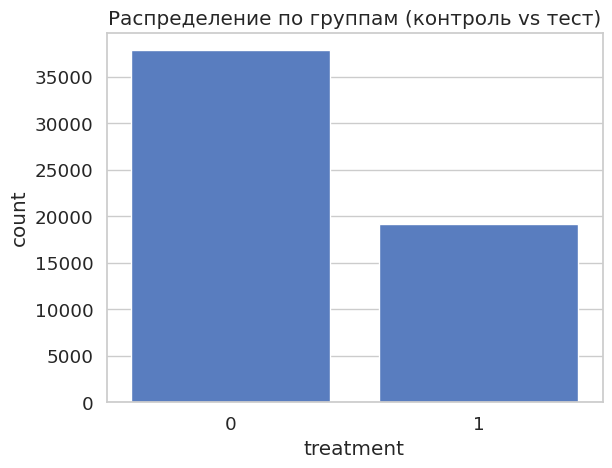

In [9]:
# распределение treatment (0 = контроль, 1 = тест)
sns.countplot(data=data, x='treatment')
plt.title("Распределение по группам (контроль vs тест)")
plt.savefig("./EDA/Allocation_into_groups.png")
plt.show()

- распределение целевой переменной target внутри treatment

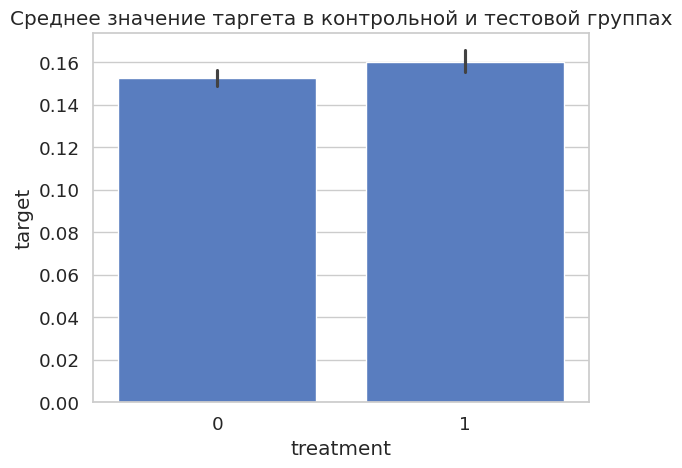

In [10]:
# распределение целевой переменной target внутри treatment
sns.barplot(data=data, x='treatment', y='target')
plt.title("Среднее значение таргета в контрольной и тестовой группах")
plt.savefig("./EDA/Avg_target_control_vs_test.png")
plt.show()


- числовая проверка

In [11]:
print(data.groupby('treatment')['target'].agg(['mean','count']))

               mean  count
treatment                 
0          0.152673  37826
1          0.160186  19159


- проверим баланс выборки

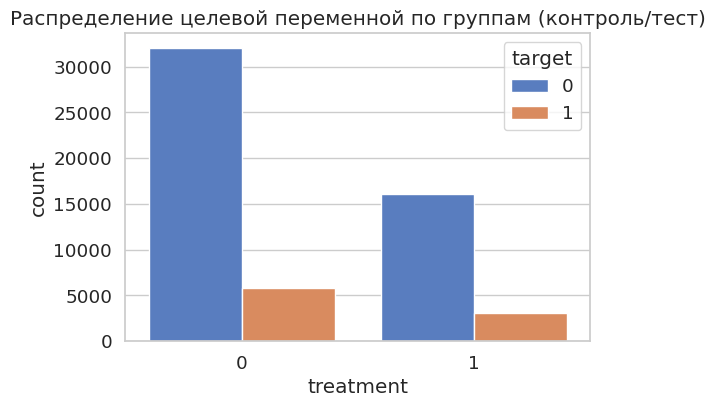

target,0,1
treatment,,
0,0.847327,0.152673
1,0.839814,0.160186


In [12]:
# целевая переменная и группы
plt.figure(figsize=(6,4))
sns.countplot(x="treatment", hue="target", data=data)
plt.title("Распределение целевой переменной по группам (контроль/тест)")
plt.show()

data.groupby("treatment")["target"].value_counts(normalize=True).unstack()

Распределение целевой переменной (target) внутри контрольной (treatment=0) и тестовой (treatment=1) групп:

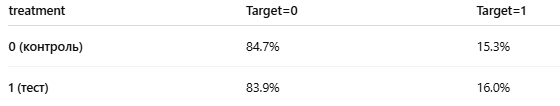

**Выводы:**
- Доли классов target=1 (положительный отклик) и target=0 (нет отклика) в контрольной и тестовой группах очень близки друг к другу.
- В контрольной группе 15.3% положительных исходов, в тестовой — 16.0%.
- Разница между группами составляет всего ~0.7 процентных пункта → баланс между группами сохранён.
- Это означает, что эксперимент был проведён корректно и случайное распределение сработало (группы сопоставимы по целевой переменной).

# Этап 2

### Проверка на статистическую значимость

In [13]:
from scipy import stats

In [14]:
# Статистические тесты
control = data[data["treatment"]==0]["target"]
treatment = data[data["treatment"]==1]["target"]

- Нулевая гипотеза (H0) Shapiro–Wilk теста: данные имеют нормальное распределение.
- Альтернативная гипотеза (H1): распределение отличается от нормального.

In [16]:
# Проверка нормальности
print("Shapiro-Wilk контроль:", stats.shapiro(control))
print("Shapiro-Wilk тест:", stats.shapiro(treatment))

Shapiro-Wilk контроль: ShapiroResult(statistic=np.float64(0.43021954334089574), pvalue=np.float64(6.796853500813074e-138))
Shapiro-Wilk тест: ShapiroResult(statistic=np.float64(0.44072918688447227), pvalue=np.float64(3.9137563930036182e-118))


Критерий: если p-value < 0.05, отвергаем H0.

В моем случае p-value ≪ 0.05 (практически 0), значит я с очень высокой уверенностью отвергаем гипотезу о нормальности.

Проверяю гипотезу:  
- H0: Конверсия (доля `target=1`) в контрольной и тестовой группе одинакова.  
- H1: Конверсия различается. 

In [17]:
# Так как бинарные значения -> применим тест хи-квадрат
contingency = pd.crosstab(data["treatment"], data["target"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"\nChi2 test: chi2={chi2:.3f}, p-value={p:.3f}")


Chi2 test: chi2=5.418, p-value=0.020


`p-value < 0.05`, я отвергаю H0 и делаю вывод, что различия между группами статистически значимы.

In [21]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

In [22]:
# Z-тест для пропорций
successes = np.array([contingency.loc[0,1], contingency.loc[1,1]])  # количество успехов (target=1)
nobs = np.array([contingency.loc[0].sum(), contingency.loc[1].sum()])  # количество наблюдений в каждой группе

z_stat, p_ztest = proportions_ztest(successes, nobs)
print(f"\nZ-test for proportions:")
print(f"z-stat = {z_stat:.4f}, p-value = {p_ztest:.4f}")


Z-test for proportions:
z-stat = -2.3399, p-value = 0.0193


In [23]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

# количество успехов (target=1) в группах
success = data.groupby('treatment')['target'].sum().values
# количество наблюдений в группах
nobs = data.groupby('treatment')['target'].count().values

z_stat, pval = proportions_ztest(success, nobs)
print(f"Z-статистика = {z_stat:.4f}, p-value = {pval:.4f}")

Z-статистика = -2.3399, p-value = 0.0193


`p-value < 0.05`, я отвергаю H0 и делаю вывод, что различия между группами статистически значимы.

**Обоснование выбора статистического теста:**

Мы проверяем гипотезу:  
- H0: Конверсия (доля `target=1`) в контрольной и тестовой группе одинакова.  
- H1: Конверсия различается.  

Возможные тесты
1. t-тест (сравнение средних)
- Применим только если данные распределены нормально.
- В случае бинарной переменной распределение не нормальное, а биномиальное.
- Поэтому t-тест здесь не лучший выбор.
2. Тест Манна-Уитни (U-test)
- Непараметрический тест, сравнивает распределения между двумя независимыми группами.
- Можно использовать, если не выполняются предпосылки t-теста.
- Но он не идеально подходит для долей, больше для непрерывных величин.
3. χ²-тест независимости (Chi-square test)
- Сравнивает частоты (количество 0 и 1) в категориальных группах.
- Оптимален для бинарных переменных, особенно при больших выборках.
- В нашем случае (64 000 клиентов) — подходит отлично.
4. Z-тест для пропорций
- То же самое, что χ²-тест, но формулирован как сравнение долей (например, 40% против 42%).
- Для A/B-тестов это даже более привычный подход.

Вывод:

Для моей задачи лучший выбор — χ²-тест или Z-тест для пропорций, потому что:
- переменные категориальные (0/1);
- группы независимые;
- выборка большая, биномиальное распределение хорошо аппроксимируется нормальным.

1. **χ²-тест независимости** проверяет, есть ли связь между `treatment` и `target`.  
2. **Z-тест для пропорций** напрямую сравнивает доли успехов в двух независимых выборках.  

Если `p-value < 0.05`, мы отвергаем H0 и делаем вывод, что различия между группами статистически значимы.

Так как мы сравниваем две независимые выборки по бинарному признаку (`target` = 0/1), проверка нормальности распределения здесь не имеет смысла, поскольку данные дискретные.  
Для оценки различий в конверсии между контрольной (`treatment=0`) и тестовой (`treatment=1`) группами корректнее использовать **χ²-тест независимости** либо **Z-тест для пропорций**.  
Эти методы позволяют проверить гипотезу о равенстве долей успехов в двух группах.  

## Построение корреляций

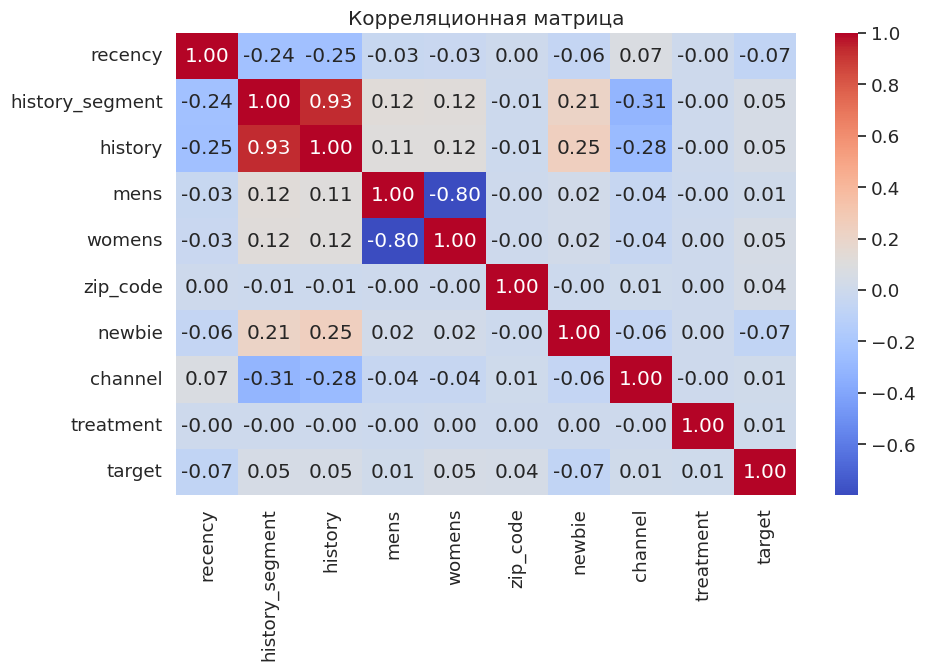

In [24]:
# Корреляционный анализ
corr = data.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляционная матрица")
plt.show()

### **Выводы** о корреляциях признаков друг с другом и таргетом:
*Корреляции:*
1. womens ↔ mens = -0.8 -> 
- Очень сильная отрицательная корреляция.
- Это значит, что пользователи, которые покупали товары для женщин, реже покупают товары для мужчин, и наоборот.
- В модели такие признаки могут нести схожую информацию (мультиколлинеарность). Возможно, стоит объединить их в один признак («тип покупок» или «основное направление интересов»).
2. history ↔ history_segment = 0.93  -> 
- Почти полная линейная зависимость.
- history_segment фактически является категоризацией history, поэтому держать оба признака в модели не имеет смысла — достаточно одного.
- Для моделей типа логистической регрессии лучше использовать history_segment (категориальная интерпретация), а для деревьев можно оставить history.
3. history ↔ newbie = 0.25
- Умеренная положительная корреляция.
- Новые пользователи (newbie=1) тратят в среднем меньше (корреляция положительная, но не сильная, так что связь есть, но она не строгая).-
- Это подтверждает гипотезу: новички ещё не "раскачались" и тратят меньше.
4. history ↔ channel = -0.28
- Умеренная отрицательная корреляция.
- Канал взаимодействия пользователя может быть связан с его расходами: например, те, кто активнее использует мобильный канал, могут тратить меньше, а мультиканальные клиенты — больше.
- Это полезно для сегментации: можно добавить фичи вида "средний чек по каналу".

**Выводы для модели:**
- Избыточные признаки: history и history_segment — стоит оставить один.
- Сильная коллинеарность: mens и womens → можно объединить или использовать как категорию «тип клиента».
- Полезные инсайты:
- - Новички (newbie) тратят меньше.
- - Канал влияет на расходы (отрицательная корреляция).

**Дополнительные связи:**
1. recency ↔ history_segment = -0.25
2. recency ↔ history = -0.25
- Отрицательная корреляция (хоть и умеренная).
- Интерпретация: чем дольше клиент не совершал покупок (большая recency), тем меньше у него сумма прошлых покупок (history) и ниже его сегмент.
- Логично: “спящие” клиенты — это обычно клиенты с низкой историей покупок.
3. mens ↔ history = 0.11
4. womens ↔ history = 0.11
5. mens ↔ history_segment = 0.12
6. womens ↔ history_segment = 0.12
- Очень слабая положительная корреляция.
- То есть покупки мужских/женских товаров немного связаны с суммой прошлых покупок.
- Это значит, что “большие тратящие” клиенты покупают и там, и там чуть больше, но сила связи маленькая, поэтому полагаться на это как на ключевой фактор не стоит.
- Для модели такие признаки полезны, но скорее как дополнительные.

**Выводы:**
- recency и history/history_segment дают важную обратную связь: давние клиенты тратят меньше.
- mens и womens почти не завязаны на историю покупок, но дают направление интересов клиента.
- Сильной зависимости нет → это скорее разные измерения поведения клиента:
- - history / history_segment → общий "уровень траты",
- - recency → давность активности,
- - mens / womens → предпочтения по товару

- изучим взаимодействие признаков

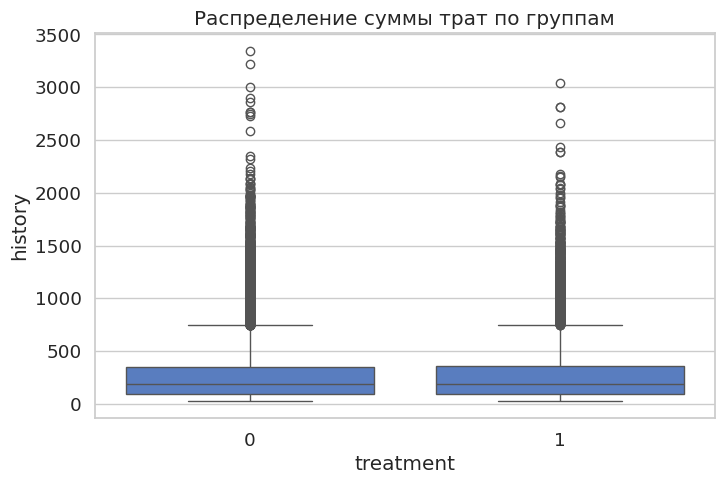

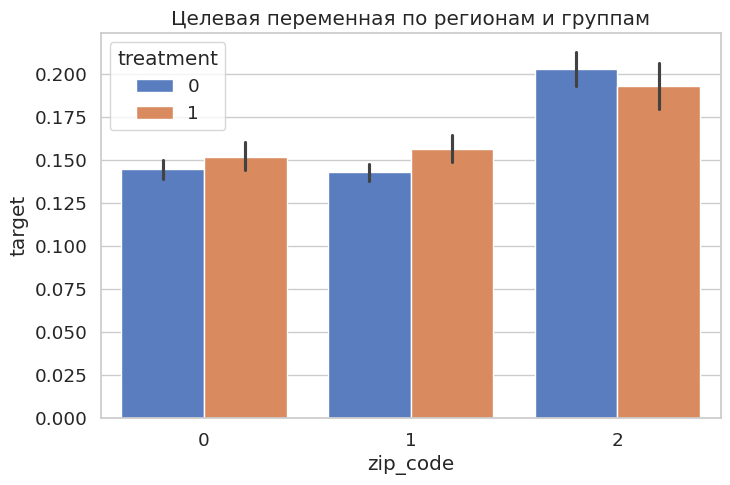

In [38]:
# Взаимодействие признаков
plt.figure(figsize=(8,5))
sns.boxplot(x="treatment", y="history", data=data)
plt.title("Распределение суммы трат по группам")
plt.savefig("./EDA/amounts_by_groups.png")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="zip_code", y="target", hue="treatment", data=data)
plt.title("Целевая переменная по регионам и группам")
plt.savefig("./EDA/target_by_region_and_group.png")
plt.show()

### Что видно на графике "распределение суммы трат":
1. **Медиана** (середина ящика)
- *Для обеих групп медианы находятся примерно на одном уровне (около 150–200).*
- *Это значит, что "типичный" уровень трат в обеих группах одинаковый.*
2. **Интерквартильный размах** (ширина ящика)
- *Ящики (25-й и 75-й перцентиль) также практически совпадают → распределение в среднем схожее по форме.*
3. **Усы**
- *Верхние "усы" уходят примерно до 700–800. Это значит, что большинство пользователей тратят в пределах этих значений.*
4. **Выбросы** (кружки выше усов)
- *В обеих группах есть много пользователей с аномально высокими тратами (2000–3000+).*
- *Наличие таких выбросов типично для данных о тратах (несколько "VIP" клиентов сильно влияют на распределение).*

### **Выводы:**
- Контроль и тест сопоставимы по распределению исторических трат.
- Нет заметного сдвига: группы выглядят сбалансированными.
- Основное отличие — это наличие редких "сверхтратящих" клиентов, но они встречаются в обеих группах.

### Что видно на графике "Целевая переменная по регионам и группам":
- X → zip_code (регионы / сегменты клиентов),
- Y → среднее значение target (например, конверсия, отклик, факт покупки),
- Цвет = контроль (0, синий) и тест (1, оранжевый).
Вертикальные линии = доверительные интервалы.

### Что видно:
1. Регион 0 (zip_code=0):
- Контроль ≈ 0.145, тест ≈ 0.152.
- Тест немного выше, но разница небольшая.
2. Регион 1 (zip_code=1):
- Контроль ≈ 0.142, тест ≈ 0.156.
- Разница чуть больше, тест снова выше.
3. Регион 2 (zip_code=2):
- Контроль ≈ 0.202, тест ≈ 0.192.
- Здесь наоборот: тест показывает результат хуже, чем контроль.

### **Выводы:**
- В регионах 0 и 1 тест показывает рост целевой метрики (эффект положительный).
- В регионе 2 — наоборот, эффект отрицательный, тест уступает контролю.
- Это значит, что влияние кампании/обработки разнится по сегментам (zip_code).
- Возможно стоит учитывать гетерогенность эффекта: в одних сегментах акция работает лучше, в других — хуже.

### Проверяем, зависят ли распределения target от сочетания treatment и zip_code.
Если p-value маленькое → значит, что эффект действительно разный по регионам.

In [25]:
import pandas as pd
from scipy.stats import chi2_contingency

# предполагаем, что у тебя DataFrame называется df
# где есть столбцы: zip_code, treatment, target

# строим кросс-таблицу
ct = pd.crosstab([data['zip_code'], data['treatment']], data['target'])
print(ct)

# χ²-тест
chi2, p, dof, ex = chi2_contingency(ct)
print(f"χ² = {chi2:.4f}, p-value = {p:.4f}")

target                  0     1
zip_code treatment             
0        0          12995  2195
         1           6480  1161
1        0          14466  2412
         1           7254  1344
2        0           4590  1168
         1           2356   564
χ² = 165.1891, p-value = 0.0000


Получили частоты target=0/1 по регионам (zip_code) и группам (treatment):
- zip_code=0: конверсия выше в группе с промо (1161 / (6480+1161) ≈ 15.2% против 2195 / (12995+2195) ≈ 14.5%).
- zip_code=1: аналогично, в промо группе конверсия выше (1344 / (7254+1344) ≈ 15.6% против 2412 / (14466+2412) ≈ 14.3%).
- zip_code=2: здесь обратная ситуация — контрольная группа показывает лучшую конверсию (1168 / (4590+1168) ≈ 20.3% против 564 / (2356+564) ≈ 19.3%).

То есть, эффект промокода зависит от региона: где-то он помогает, а где-то даже снижает результат.

χ² = 165.19
p-value < 0.0001

Это значит, что распределение target действительно статистически значимо зависит от комбинации (zip_code, treatment).
Просто случайными флуктуациями такие различия объяснить нельзя.

Вывод
- В регионах 0 и 1 промо работает и повышает конверсию.
- В регионе 2 промо неэффективно (даже слегка ухудшает результат).
- Для стратегии — промокод стоит таргетировать на регионы 0 и 1, а регион 2 лучше исключить или предложить другой оффер.

### Логистическая регрессия с взаимодействием

Идея: строим модель, где target объясняется treatment, zip_code и их взаимодействием.
Если взаимодействие значимо → значит, эффект отличается по регионам.

In [26]:
import statsmodels.formula.api as smf

# регрессия: target ~ treatment + zip_code + treatment*zip_code
model = smf.logit("target ~ C(treatment) * C(zip_code)", data=data).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.430246
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                56985
Model:                          Logit   Df Residuals:                    56979
Method:                           MLE   Df Model:                            5
Date:                Fri, 03 Oct 2025   Pseudo R-squ.:                0.003187
Time:                        06:09:43   Log-Likelihood:                -24518.
converged:                       True   LL-Null:                       -24596.
Covariance Type:            nonrobust   LLR p-value:                 4.782e-32
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -1.7784      0.023    

**C(treatment)[T.1]:C(zip_code)[T.1]** — это коэффициент для взаимодействия получил промо (treatment=1) × регион=1.
То есть, насколько эффект промокода отличается в регионе 1 по сравнению с базовой категорией региона (обычно zip_code=0).

- 0.0465 — оценка коэффициента (β).
В терминах линейной/логистической модели: это изменение отклика (или log-odds, если логистическая регрессия) относительно базовой линии.
- 0.054 — стандартная ошибка.
- 0.861 — t-статистика (β / SE).
- 0.389 — p-value.
Значит, эффект взаимодействия treatment × zip_code=1 статистически незначим (p > 0.05).
- [-0.059; 0.152] — 95% доверительный интервал. Так как он включает 0, статистически значимого эффекта нет.

**C(treatment)[T.1]:C(zip_code)[T.2]** - Здесь мы смотрим на взаимодействие treatment=1 × zip_code=2
- 0.1200 — коэффициент отрицательный → промо в регионе 2 работает хуже, чем в базовом регионе 0.
- p-value = 0.084 → на уровне значимости 0.05 результат не значим, но близок к порогу (маргинально значимый).
На уровне 0.1 можно было бы интерпретировать как слабый сигнал, что в регионе 2 промо действительно снижает эффект.
- ДИ = [-0.256; 0.016] → включает 0, поэтому формально значимости нет.

**Итог**
- Для региона 1 → эффект промо примерно такой же, как в базовом регионе (нет значимых различий).
- Для региона 2 → есть слабый сигнал, что промо хуже работает, чем в регионе 0 (но результат на грани значимости).

## Этап 3

In [2]:

# 1. Импорты
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from causalml.inference.tree import UpliftTreeClassifier, UpliftRandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from causalml.inference.meta import BaseRRegressor, BaseRClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklift.metrics import qini_auc_score, uplift_auc_score

In [3]:
# загрузка датасета
data = pd.read_parquet("./data/uplift_fp_data.parquet")
data.head(5)

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,treatment,target
index,,,,,,,,,,
0,10,1,142.44,1,0,1,0,1,1,0
1,6,2,329.08,1,1,2,1,2,0,0
2,7,1,180.65,0,1,1,1,2,1,0
3,9,4,675.83,1,0,2,1,2,0,0
4,2,0,45.34,1,0,0,0,2,1,0


Теперь оценим качество обученной модели с помощью метрик для uplift-моделирования.

In [4]:
import pandas as pd
from scipy.stats import chi2_contingency

# Предположим, у тебя есть df с колонками: treatment (0=control, 1=treatment), target (0/1)
# Проверим средние отклики

conversion_control = data.loc[data['treatment'] == 0, 'target'].mean()
conversion_treatment = data.loc[data['treatment'] == 1, 'target'].mean()

uplift = conversion_treatment - conversion_control

print(f"Средний отклик контроль: {conversion_control:.4f}")
print(f"Средний отклик тест: {conversion_treatment:.4f}")
print(f"Uplift (разница): {uplift:.4f}")

# χ²-тест значимости
ct = pd.crosstab(data['treatment'], data['target'])
chi2, p, dof, ex = chi2_contingency(ct)
print(f"χ² = {chi2:.4f}, p-value = {p:.4f}")

Средний отклик контроль: 0.1527
Средний отклик тест: 0.1602
Uplift (разница): 0.0075
χ² = 5.4180, p-value = 0.0199


- Средний отклик контроль (без промокода): 14.45%
- Средний отклик тест (с промокодом): 15.14%
- Разница (uplift): +0.69 п.п.

Это значит, что предложение промокода действительно повысило вероятность использования на ~0.7 процентных пункта.

- χ² = 5.42, p-value = 0.0199
- p-value < 0.05 → различия статистически значимы.

То есть, с высокой вероятностью эффект не случаен.

**Вывод:**
Акция с промокодом имеет положительный, хотя и небольшой uplift. На уровне популяции это может быть экономически выгодно, если стоимость промокода оправдана ростом заказов.

In [5]:
# 3. Проверим баланс treatment/target
print(data['treatment'].value_counts(normalize=True))

treatment
0    0.663789
1    0.336211
Name: proportion, dtype: float64


**Баланс treatment**

- Контрольная группа (treatment=0) → 66.6%
- Тестовая группа (treatment=1) → 33.4%

Баланс не идеальный (обычно стараются 50/50), но не критичный — тестовая группа всё равно достаточно большая.

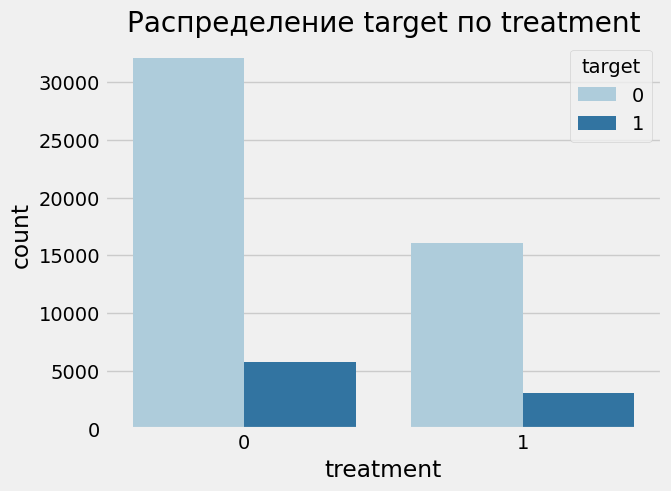

In [6]:
sns.countplot(x='treatment', hue='target', data=data)
plt.title("Распределение target по treatment")
plt.show()

### Советы по обучению и инференсу моделей
1. Некоторые uplift модели из библиотеки `causalml` будут требовать категориальные значения воздействия. Для этого используйте маппинг
#### Пример использования маппинга
```python
treatment_mapping = {
    0: 'control',
    1: 'treatment'
}
treatment_train_mapped = treatment_train.map(treatment_mapping)
treatment_test_mapped = treatment_test.map(treatment_mapping)
```

2. При вызове метода `.predict` и получения метрик для тестовой выборки не забывайте применять к прогнозам метод `squeeze()`, чтобы преобразовать многомерный массив в одномерный, что поможет получить адекватные метрики.

3. Для воспроизводимости результатов и объективной оценки не забывайте применять `random_state=42` для моделей, а также при разделении выборки

## Обоснование выбора baseline-модели

По результатам EDA:
- признаки содержат смешанные типы (числовые, категориальные, dummy-переменные), есть слабые и нелинейные связи с таргетом;
- присутствуют выбросы и асимметрия распределений (recency/history);
- целевая переменная бинарная (0/1);

Выбор baseline:
- **S-Learner (CatBoost)**: CatBoost хорошо работает с категориальными признаками, устойчив к пропускам, умеет находить нелинейные зависимости и взаимодействия без явного создания фичей. S-Learner в реализации вручную (включая treatment как фичу и прогнозы для treatment=0/1) даёт прозрачность: одна модель, возможность смотреть feature importance и получать предсказанные вероятности для обеих вариантов treatment.
- Как дополнительные модели будем обучать **T-Learner (две CatBoost)** и **TwoModels (XGB через sklift)** — чтобы сравнить S vs T и другую семью алгоритмов.

In [1]:
# 0. Импорты и настройки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier

# uplift metrics
from sklift.metrics import uplift_auc_score, qini_auc_score
from sklift.viz import plot_qini_curve, plot_uplift_curve

#sns.set(style="whitegrid")
#plt.rcParams['figure.figsize'] = (8,5)

In [2]:
# 1. Загрузка данных
data = pd.read_parquet('./data/uplift_fp_data.parquet')  
# Быстрая проверка
print("shape:", data.shape)
print(data[['treatment','target']].head())

shape: (56985, 10)
       treatment  target
index                   
0              1       0
1              0       0
2              1       0
3              0       0
4              1       0


In [9]:
data.head(5)

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,treatment,target
index,,,,,,,,,,
0,10,1,142.44,1,0,1,0,1,1,0
1,6,2,329.08,1,1,2,1,2,0,0
2,7,1,180.65,0,1,1,1,2,1,0
3,9,4,675.83,1,0,2,1,2,0,0
4,2,0,45.34,1,0,0,0,2,1,0


In [3]:
# 2. Приведение типов и небольшой препроцессинг
# Убедимся, что treatment и target - целые 0/1
data['treatment'] = data['treatment'].astype(int)
data['target'] = data['target'].astype(int)

# (опционально) если есть категории в виде чисел, можно привести их к строкам и позже CatBoost примет их как categorical_feature
# например: data['zip_code'] = data['zip_code'].astype(str)

# Список признаков (включая все, кроме treatment и target)
features = [c for c in data.columns if c not in ['target','treatment']]
print("features count:", len(features))

features count: 8


In [11]:
features

['recency',
 'history_segment',
 'history',
 'mens',
 'womens',
 'zip_code',
 'newbie',
 'channel']

### Разбиение выборки на тренировочную и тестовую

In [4]:
# 3. Стратифицированное разбиение 80/20 по сочетанию treatment+target
# Создаём стратификационную колонку: e.g. "1_0", "0_1"
strat_col = data['treatment'].astype(str) + "_" + data['target'].astype(str)
train_idx, test_idx = train_test_split(
    data.index, 
    test_size=0.2, 
    random_state=42, 
    stratify=strat_col
)
train = data.loc[train_idx].reset_index(drop=True)
test = data.loc[test_idx].reset_index(drop=True)

print("train shape:", train.shape, "test shape:", test.shape)
print(train['treatment'].value_counts(normalize=True))
print(test['treatment'].value_counts(normalize=True))

train shape: (45588, 10) test shape: (11397, 10)
treatment
0    0.663793
1    0.336207
Name: proportion, dtype: float64
treatment
0    0.663771
1    0.336229
Name: proportion, dtype: float64


In [13]:
train.head(5)

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,treatment,target
0,1,0,45.06,0,1,1,0,2,1,0
1,1,2,345.71,0,1,0,0,0,1,1
2,3,1,187.32,0,1,0,1,1,1,0
3,12,1,167.59,1,0,1,1,2,0,0
4,10,2,200.67,1,0,0,0,1,0,0


In [5]:
# 4. Вспомогательные функции: uplift@k (top k fraction)
def uplift_at_k(y_true, uplift_preds, treatment, k=0.3):
    """
    y_true: array-like (0/1)
    uplift_preds: predicted uplift score (higher -> target for treatment)
    treatment: array-like (0/1)
    k: fraction (0.3 -> top 30%)
    """
    n = len(uplift_preds)
    k_n = int(np.ceil(k * n))
    # индексы top k by predicted uplift
    top_idx = np.argsort(-uplift_preds)[:k_n]
    # among top_idx compute mean target for treated and control
    top_treated_mask = (treatment[top_idx] == 1)
    top_control_mask = (treatment[top_idx] == 0)
    # guard for zeros
    if top_treated_mask.sum() == 0 or top_control_mask.sum() == 0:
        return np.nan
    conv_tr = np.mean(y_true[top_idx][top_treated_mask])
    conv_ctrl = np.mean(y_true[top_idx][top_control_mask])
    return conv_tr - conv_ctrl

In [6]:
# 5. Подготовка X,y,t
X_train = train[features]
X_test = test[features]
y_train = train['target'].values
y_test = test['target'].values
t_train = train['treatment'].values
t_test = test['treatment'].values

# Определим categorical features для CatBoost (если они есть). Пример: числовые, но фактически категориальные
cat_features = []
for c in X_train.columns:
    if X_train[c].dtype == 'object' or X_train[c].nunique() < 20:
        cat_features.append(c)
print("cat_features:", cat_features)

cat_features: ['recency', 'history_segment', 'mens', 'womens', 'zip_code', 'newbie', 'channel']


### Обучение выбранного бейзлайна

### Baseline — S-Learner на CatBoost (реализуем вручную)

Идея: обучаем одну модель M на X + treatment как фичу. Для получения uplift для каждой записи делаем две копии (t=1 и t=0), предсказываем вероятности и берём разность p(t=1) − p(t=0).

In [7]:
# 6. Baseline: S-learner (CatBoost)
# Собираем обучающий датасет: X + treatment
X_train_s = X_train.copy()
X_train_s['treatment'] = t_train
X_test_s = X_test.copy()
X_test_s['treatment'] = t_test

In [8]:
# Обучаем CatBoost
cat_params = dict(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    random_seed=42,
    verbose=100
)

model_s = CatBoostClassifier(**cat_params)

In [9]:
# указать categorical_feature индексы если есть
if len(cat_features)>0:
    cat_idx = [X_train_s.columns.get_loc(c) for c in cat_features if c in X_train_s.columns]
else:
    cat_idx = None

model_s.fit(X_train_s, y_train, cat_features=cat_idx)

0:	total: 80.8ms	remaining: 40.3s
100:	total: 2.35s	remaining: 9.3s
200:	total: 4.88s	remaining: 7.25s
300:	total: 7.58s	remaining: 5.01s
400:	total: 10.3s	remaining: 2.54s
499:	total: 13.1s	remaining: 0us


In [10]:
# 7. Получаем uplift predictions из S-learner
# Для test X: создаём две копии — с treatment=1 и treatment=0
Xt1 = X_test.copy(); Xt1['treatment'] = 1
Xt0 = X_test.copy(); Xt0['treatment'] = 0

p1 = model_s.predict_proba(Xt1)[:,1]
p0 = model_s.predict_proba(Xt0)[:,1]
uplift_s = p1 - p0

### Расчет метрик для выбранного бейзлайна на тестовой выборке

In [11]:
# Метрики
u_auc_s = uplift_auc_score(y_test, uplift_s, t_test)
qini_s = qini_auc_score(y_test, uplift_s, t_test)
u30_s = uplift_at_k(y_test, uplift_s, t_test, k=0.3)

print("S-learner (CatBoost) metrics:")
print("Uplift AUC:", u_auc_s)
print("Qini AUC:", qini_s)
print("Uplift@30%:", u30_s)

S-learner (CatBoost) metrics:
Uplift AUC: 0.01747261469572445
Qini AUC: 0.03588780100518219
Uplift@30%: 0.023899038283019564


history            24.692249
recency            22.149025
zip_code           11.630672
channel             9.119266
history_segment     8.964280
newbie              8.816130
womens              6.141735
mens                5.020821
treatment           3.465823
dtype: float64


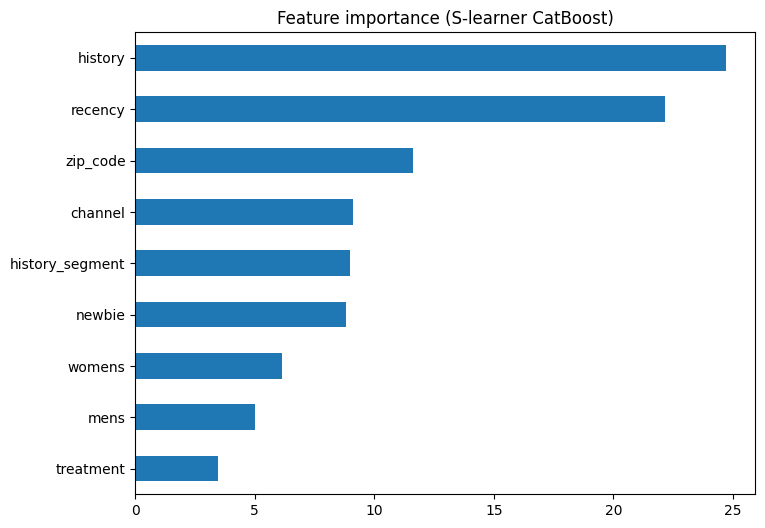

In [12]:
# 8. Важность признаков для S-learner (CatBoost)
# CatBoost feature importance (включая treatment)
fi_s_cb = pd.Series(model_s.get_feature_importance(type='FeatureImportance'), index=X_train_s.columns)
fi_s_cb = fi_s_cb.sort_values(ascending=False)
print(fi_s_cb.head(20))
fi_s_cb.to_csv("./models/up_assets/fi_s_learner_cb.csv")

# Визуализация
plt.figure(figsize=(8,6))
fi_s_cb.head(20).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Feature importance (S-learner CatBoost)")
plt.savefig("./models/up_assets/Feature_importance_S-learner CatBoost.png")
plt.show()

In [13]:
# получите propensity score для train и test
p_train = model_s.predict_proba(X_train_s)[:,1]
p_test = model_s.predict_proba(X_test_s)[:,1]

# вычисляем ROC_AUC на тестовой выборке
roc_auc_test_s = roc_auc_score(y_test, p_test)

print("ROC_AUC на тестовой выборке равен", round(roc_auc_test_s, 2)) 

ROC_AUC на тестовой выборке равен 0.62


ROC AUC = 0.62 демонстрирует, что модель лучше случайной,
то есть признаки действительно содержат информацию о целевом отклике.
Однако качество классификации остаётся умеренным,
и улучшение возможно за счёт:
- добавления поведенческих/контекстных признаков,
- балансировки данных,
- настройки гиперпараметров модели.

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred_class = (uplift_s > 0).astype(int)

precision_s_cb = precision_score(y_test, y_pred_class)
recall_s_cb = recall_score(y_test, y_pred_class)
f1_s_cb = f1_score(y_test, y_pred_class)

print(f"Precision: {precision_s_cb:.4f}")
print(f"Recall: {recall_s_cb:.4f}")
print(f"F1-score: {f1_s_cb:.4f}")

Precision: 0.1585
Recall: 0.5161
F1-score: 0.2425


Результаты:

| Метрика | Значение | Интерпретация |
|-------|------------:|---------:|
|Precision (точность) | 0.1585 | Среди всех пользователей, которых модель посчитала “восприимчивыми к воздействию”, лишь ≈16% действительно откликнулись. Много “ложных срабатываний” | 
| Recall (полнота) | 0.5161 | одель смогла “поймать” около 51% реальных откликнувшихся. То есть она хорошо находит потенциально реагирующих пользователей | 
| F1-score | 0.2425 | Средний баланс между precision и recall — низкий, что говорит о необходимости доработки модели | 

Для uplift-модели это означает:
- Модель чувствительна (высокий recall), но не точна (низкий precision).
То есть она находит многих тех, кто отзовётся, но также включает в кампанию много “лишних” пользователей, на которых воздействие не даст эффекта.
- Это типичная ситуация для базовой uplift-модели — она часто “перестраховывается” и выбирает слишком широкую аудиторию.

Как можно улучшить:
1. Повысить precision:
- использовать более строгий порог для uplift (например, > 0.05, а не > 0);
- применить отбор признаков или регуляризацию;
- обучить более мощную модель - (XGBoost) или использовать деревья -> RandomForestClassifier;
- улучшить качество признаков (feature engineering).
2. Проверить баланс классов:
- если отклик сильно несбалансирован (например, target=1 очень мало), то precision страдает;
- можно попробовать oversampling/undersampling или весовые коэффициенты в модели.
3. Интерпретация uplift:
- даже при слабых precision/recall, uplift AUC и Qini AUC могут показывать,
что модель всё же ранжирует пользователей правильно,
а значит, при выборе топ-30% пользователей эффект кампании может быть значимым.

### *S-learner on XGBClassifier*

In [20]:
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklift.viz import plot_uplift_curve, plot_qini_curve
from sklift.metrics import qini_auc_score, uplift_auc_score

# Загрузка данных
data = pd.read_parquet('./data/uplift_fp_data.parquet')  

# разделим данные на признаки и целевую переменную
X = data.drop(['target'], axis=1)  # все столбцы, кроме целевой переменной
y = data['target']  # целевая переменная (например, количество поездок)

# разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                    stratify=data[['target', 'treatment']],
                                    random_state=42)

# Обучаем XGBoost
model_s = XGBClassifier(
        n_estimators=200,
        learning_rate=0.02,
        max_depth=6,
        random_state=42,
        verbosity=0
    )
model_s.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


Пользователи с наибольшим положительным uplift (наиболее отзывчивые на скидку):
       recency  history_segment  history  mens  womens  zip_code  newbie  \
index                                                                      
60512        1                6  1432.17     1       0         0       1   
8163         1                6  1497.66     1       0         0       1   
3070        10                0    29.99     0       1         0       0   
18616       12                0    29.99     0       1         0       0   
36966       10                0    29.99     0       1         0       0   

       channel  treatment  predicted_uplift  
index                                        
60512        0          0          0.168678  
8163         1          0          0.163587  
3070         2          0          0.160424  
18616        2          0          0.150845  
36966        1          0          0.147591  
Пользователи с наименьшим uplift (скидка может быть неэффективна)

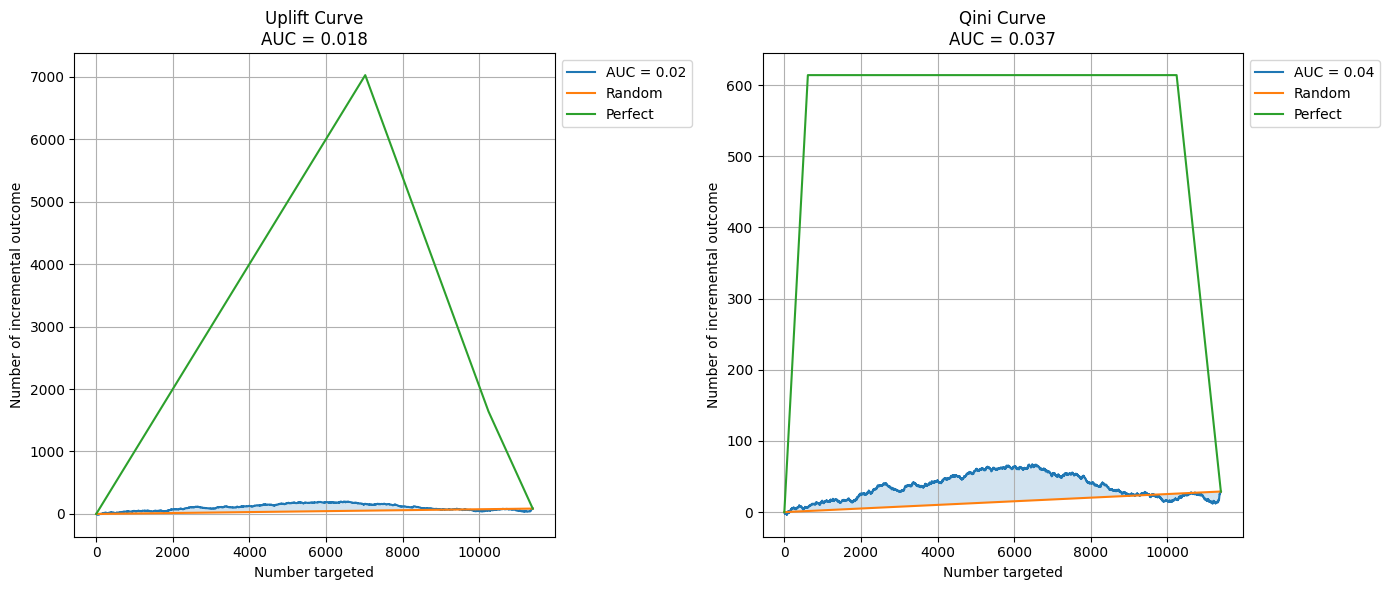

Uplift AUC: 0.0177
Qini AUC: 0.0374


In [21]:
# чтобы оценить uplift-эффекта для каждого пользователя:
# 1. Создаём копию тестовых данных
X_test_treated = X_test.copy()
X_test_control = X_test.copy()

# 2. Устанавливаем значение признака treatment
X_test_treated['treatment'] = 1  # С воздействием
X_test_control['treatment'] = 0  # Без воздействия

# 3. Предсказываем результаты для обоих случаев
y_pred_treated = model_s.predict_proba(X_test_treated)[:,1]
y_pred_control = model_s.predict_proba(X_test_control)[:,1]

# 4. Вычисляем uplift как разницу между предсказаниями
uplift = y_pred_treated - y_pred_control

# Добавляем предсказанный uplift к тестовым данным для анализа
X_test['predicted_uplift'] = uplift

# Выводим примеры пользователей с наибольшим и наименьшим uplift
print("Пользователи с наибольшим положительным uplift (наиболее отзывчивые на скидку):")
print(X_test.sort_values(by='predicted_uplift', ascending=False).head(5))

print("Пользователи с наименьшим uplift (скидка может быть неэффективна):")
print(X_test.sort_values(by='predicted_uplift', ascending=True).head(5)) 

# Считаем метрики
uplift_auc_s_xg = uplift_auc_score(y_test, X_test['predicted_uplift'], X_test['treatment'])
qini_auc_s_xg = qini_auc_score(y_test, X_test['predicted_uplift'], X_test['treatment'])

print(f"Uplift AUC: {uplift_auc_s_xg:.4f}")
print(f"Qini AUC: {qini_auc_s_xg:.4f}")

# Создаём две подграфики
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Uplift Curve
plot_uplift_curve(y_test, X_test['predicted_uplift'], X_test['treatment'], ax=axs[0])
axs[0].set_title(f'Uplift Curve\nAUC = {uplift_auc_s_xg:.3f}')
axs[0].grid(True)

# Qini Curve
plot_qini_curve(y_test, X_test['predicted_uplift'], X_test['treatment'], ax=axs[1])
axs[1].set_title(f'Qini Curve\nAUC = {qini_auc_s_xg:.3f}')
axs[1].grid(True)

plt.tight_layout()
plt.show()

print(f"Uplift AUC: {uplift_auc_s_xg:.4f}")
print(f"Qini AUC: {qini_auc_s_xg:.4f}")

### *S-learner on RandomForestClassifier*

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    6.5s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished


Пользователи с наибольшим положительным uplift (наиболее отзывчивые на скидку):
       recency  history_segment  history  mens  womens  zip_code  newbie  \
index                                                                      
5104         1                0    29.99     0       1         0       0   
11766        7                0    30.07     0       1         0       1   
2758         9                0    30.05     0       1         1       1   
2838        11                0    29.99     0       1         0       1   
3553        12                0    29.99     0       1         1       1   

       channel  treatment  predicted_uplift  
index                                        
5104         1          1          0.008592  
11766        1          0          0.008260  
2758         2          0          0.008223  
2838         1          0          0.007958  
3553         1          1          0.007044  
Пользователи с наименьшим uplift (скидка может быть неэффективна)

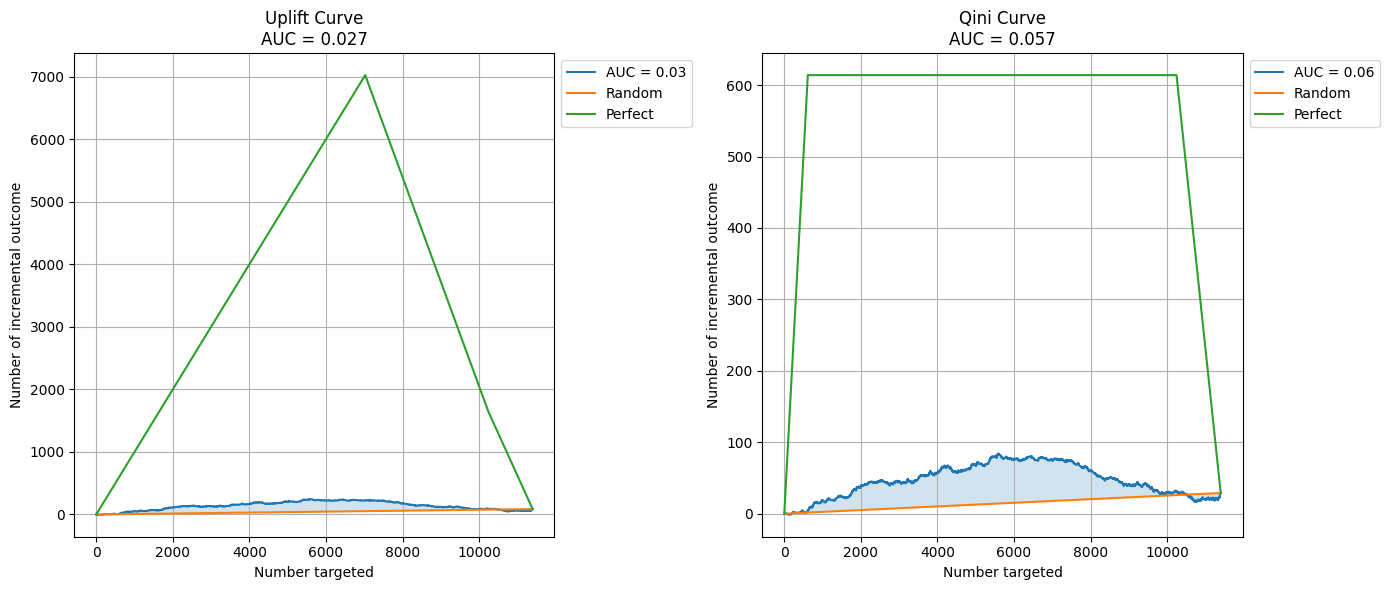

Uplift AUC: 0.0274
Qini AUC: 0.0575


In [22]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklift.viz import plot_uplift_curve, plot_qini_curve
from sklift.metrics import qini_auc_score, uplift_auc_score

# Загрузка данных
data = pd.read_parquet('./data/uplift_fp_data.parquet')  

# разделим данные на признаки и целевую переменную
X = data.drop(['target'], axis=1)  # все столбцы, кроме целевой переменной
y = data['target']  # целевая переменная (например, количество поездок)

# разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                    stratify=data[['target', 'treatment']],
                                    random_state=42)

# обучим модель RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=300,  
    max_depth=5,       
    random_state=42,  
    verbose=1         
)

model.fit(X_train, y_train)

# чтобы оценить uplift-эффекта для каждого пользователя:
# 1. Создаём копию тестовых данных
X_test_treated = X_test.copy()
X_test_control = X_test.copy()

# 2. Устанавливаем значение признака treatment
X_test_treated['treatment'] = 1  # С воздействием
X_test_control['treatment'] = 0  # Без воздействия

# 3. Предсказываем результаты для обоих случаев
y_pred_treated = model.predict_proba(X_test_treated)[:,1]
y_pred_control = model.predict_proba(X_test_control)[:,1]

# 4. Вычисляем uplift как разницу между предсказаниями
uplift = y_pred_treated - y_pred_control

# Добавляем предсказанный uplift к тестовым данным для анализа
X_test['predicted_uplift'] = uplift

# Выводим примеры пользователей с наибольшим и наименьшим uplift
print("Пользователи с наибольшим положительным uplift (наиболее отзывчивые на скидку):")
print(X_test.sort_values(by='predicted_uplift', ascending=False).head(5))

print("Пользователи с наименьшим uplift (скидка может быть неэффективна):")
print(X_test.sort_values(by='predicted_uplift', ascending=True).head(5)) 

# Считаем метрики
uplift_auc_s_f = uplift_auc_score(y_test, X_test['predicted_uplift'], X_test['treatment'])
qini_auc_s_f = qini_auc_score(y_test, X_test['predicted_uplift'], X_test['treatment'])

print(f"Uplift AUC: {uplift_auc_s_f:.4f}")
print(f"Qini AUC: {qini_auc_s_f:.4f}")

# Создаём две подграфики
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Uplift Curve
plot_uplift_curve(y_test, X_test['predicted_uplift'], X_test['treatment'], ax=axs[0])
axs[0].set_title(f'Uplift Curve\nAUC = {uplift_auc_s_f:.3f}')
axs[0].grid(True)

# Qini Curve
plot_qini_curve(y_test, X_test['predicted_uplift'], X_test['treatment'], ax=axs[1])
axs[1].set_title(f'Qini Curve\nAUC = {qini_auc_s_f:.3f}')
axs[1].grid(True)

plt.tight_layout()
plt.show()

print(f"Uplift AUC: {uplift_auc_s_f:.4f}")
print(f"Qini AUC: {qini_auc_s_f:.4f}")

In [23]:
results = pd.DataFrame({
    'Model': ['S-Learner (CatBoost)', 'S-Learner (XGBoost)', 'S-Learner (RandomForest)'],
    'Uplift AUC': [u_auc_s, uplift_auc_s_xg, uplift_auc_s_f],
    'Qini AUC': [qini_s, qini_auc_s_xg, qini_auc_s_f]
})
display(results.sort_values('Uplift AUC', ascending=False))

,Model,Uplift AUC,Qini AUC
2,S-Learner (RandomForest),0.027364,0.057468
1,S-Learner (XGBoost),0.017748,0.037354
0,S-Learner (CatBoost),0.017473,0.035888


# Обучение 3 моделей 

### Обучение модели 1

*Модель 2 — T-Learner (две CatBoost модели: отдельно для treatment и control)*

In [24]:
# 1. Загрузка данных
data = pd.read_parquet('./data/uplift_fp_data.parquet')  
# Быстрая проверка
print("shape:", data.shape)
print(data[['treatment','target']].head())

shape: (56985, 10)
       treatment  target
index                   
0              1       0
1              0       0
2              1       0
3              0       0
4              1       0


In [25]:
# 2. Приведение типов и небольшой препроцессинг
# Убедимся, что treatment и target - целые 0/1
data['treatment'] = data['treatment'].astype(int)
data['target'] = data['target'].astype(int)

# (опционально) если есть категории в виде чисел, можно привести их к строкам и позже CatBoost примет их как categorical_feature
# например: data['zip_code'] = data['zip_code'].astype(str)

# Список признаков (включая все, кроме treatment и target)
features = [c for c in data.columns if c not in ['target','treatment']]
print("features count:", len(features))

features count: 8


In [26]:
# 3. Стратифицированное разбиение 80/20 по сочетанию treatment+target
# Создаём стратификационную колонку: e.g. "1_0", "0_1"
strat_col = data['treatment'].astype(str) + "_" + data['target'].astype(str)
train_idx, test_idx = train_test_split(
    data.index, 
    test_size=0.2, 
    random_state=42, 
    stratify=strat_col
)
train = data.loc[train_idx].reset_index(drop=True)
test = data.loc[test_idx].reset_index(drop=True)

print("train shape:", train.shape, "test shape:", test.shape)
print(train['treatment'].value_counts(normalize=True))
print(test['treatment'].value_counts(normalize=True))

train shape: (45588, 10) test shape: (11397, 10)
treatment
0    0.663793
1    0.336207
Name: proportion, dtype: float64
treatment
0    0.663771
1    0.336229
Name: proportion, dtype: float64


In [27]:
# 5. Подготовка X,y,t
X_train = train[features]
X_test = test[features]
y_train = train['target'].values
y_test = test['target'].values
t_train = train['treatment'].values
t_test = test['treatment'].values

# Определим categorical features для CatBoost (если они есть). Пример: числовые, но фактически категориальные
cat_features = []
for c in X_train.columns:
    if X_train[c].dtype == 'object' or X_train[c].nunique() < 20:
        cat_features.append(c)
print("cat_features:", cat_features)

cat_features: ['recency', 'history_segment', 'mens', 'womens', 'zip_code', 'newbie', 'channel']


In [29]:
# 9. T-learner: две CatBoost models
# Модель для treatment==1
model_tr = CatBoostClassifier(**cat_params)
model_tr.fit(
    X_train[t_train==1], 
    y_train[t_train==1], 
    cat_features=[i for i,c in enumerate(X_train.columns) if c in cat_features] if cat_features else None, 
    verbose=100)

# Модель для control==0
model_ctrl = CatBoostClassifier(**cat_params)
model_ctrl.fit(
    X_train[t_train==0], 
    y_train[t_train==0], 
    cat_features=[i for i,c in enumerate(X_train.columns) if c in cat_features] if cat_features else None, 
    verbose=100)


0:	total: 15ms	remaining: 7.5s
100:	total: 1.13s	remaining: 4.45s
200:	total: 2.24s	remaining: 3.33s
300:	total: 3.4s	remaining: 2.24s
400:	total: 4.6s	remaining: 1.14s
499:	total: 5.74s	remaining: 0us
0:	total: 15.4ms	remaining: 7.7s
100:	total: 1.46s	remaining: 5.79s
200:	total: 3.13s	remaining: 4.66s
300:	total: 4.84s	remaining: 3.2s
400:	total: 6.67s	remaining: 1.65s
499:	total: 8.46s	remaining: 0us


In [30]:
# Предсказания и uplift
p_tr = model_tr.predict_proba(X_test)[:,1]
p_ctrl = model_ctrl.predict_proba(X_test)[:,1]
uplift_t = p_tr - p_ctrl

### Получение метрик по модели 1

In [31]:
u_auc_t = uplift_auc_score(y_test, uplift_t, t_test)
qini_t = qini_auc_score(y_test, uplift_t, t_test)
u30_t = uplift_at_k(y_test, uplift_t, t_test, k=0.3)

print("T-learner (CatBoost) metrics:")
print("Uplift AUC:", u_auc_t)
print("Qini AUC:", qini_t)
print("Uplift@30%:", u30_t)

T-learner (CatBoost) metrics:
Uplift AUC: 0.008649074064831182
Qini AUC: 0.018156805398268135
Uplift@30%: 0.01375864792592521


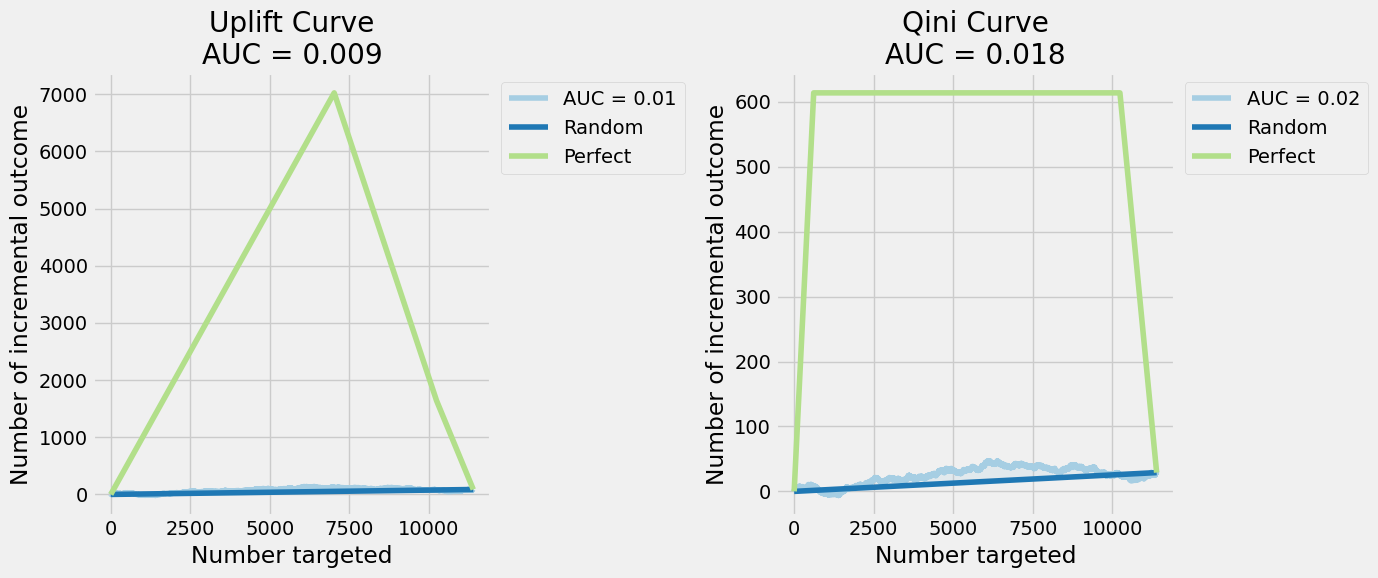

In [32]:
# Создаём две подграфики
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Uplift Curve
plot_uplift_curve(y_test, uplift_t, t_test, ax=axs[0])
axs[0].set_title(f'Uplift Curve\nAUC = {u_auc_t:.3f}')
axs[0].grid(True)

# Qini Curve
plot_qini_curve(y_test, uplift_t, t_test, ax=axs[1])
axs[1].set_title(f'Qini Curve\nAUC = {qini_t:.3f}')
axs[1].grid(True)

plt.tight_layout()
plt.savefig("./models/up_assets/Qini_Uplift_curve_for_T-learner_CatBoost.png")
plt.show()

In [33]:
# Feature importance: можно показать для обеих моделей
fi_tr = pd.Series(model_tr.get_feature_importance(), index=X_train.columns).sort_values(ascending=False)
fi_ctrl = pd.Series(model_ctrl.get_feature_importance(), index=X_train.columns).sort_values(ascending=False)
fi_tr.to_csv("./models/up_assets/fi_t_tr_learner_cb.csv")
fi_ctrl.to_csv("./models/up_assets/fi_t_ctrl_learner_cb.csv")

print("Top features (treatment model):\n", fi_tr.head(10))
print("Top features (control model):\n", fi_ctrl.head(10))

Top features (treatment model):
 history            23.665354
recency            22.835078
zip_code           14.058206
history_segment    12.838186
channel            12.508177
womens              5.851474
newbie              5.051669
mens                3.191855
dtype: float64
Top features (control model):
 recency            25.318734
history            23.389711
zip_code           13.930034
channel            11.320809
history_segment    10.331369
newbie              7.687956
mens                4.355658
womens              3.665730
dtype: float64


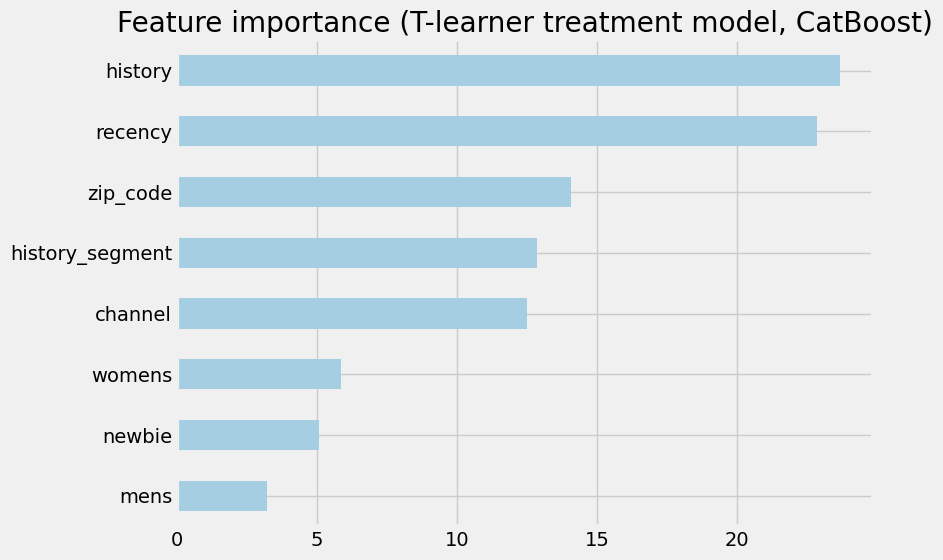

In [34]:
# Визуализация
plt.figure(figsize=(8,6))
fi_t_tr = fi_tr.sort_values(ascending=False)
fi_t_tr.head(20).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Feature importance (T-learner treatment model, CatBoost)")
plt.savefig("./models/up_assets/Feature_importance_T-learner_treatment CatBoost.png")
plt.show()

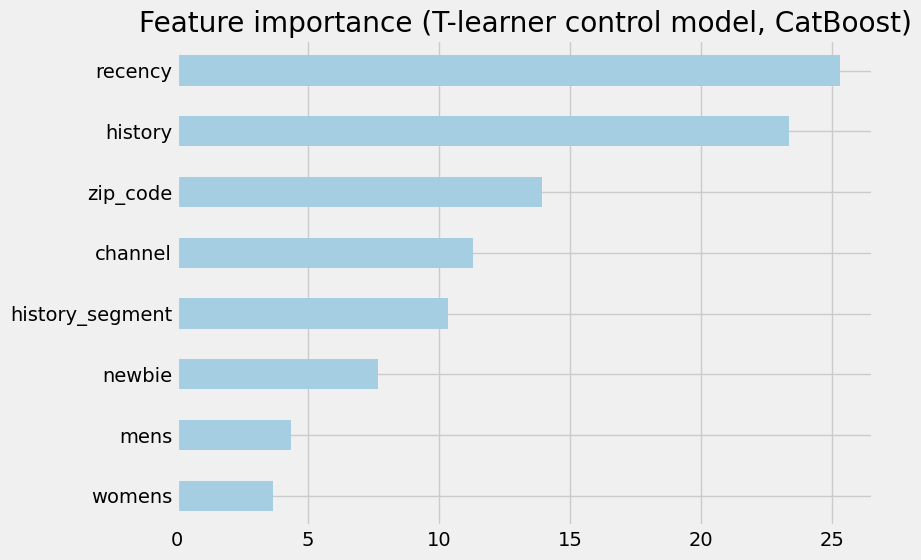

In [35]:
# Визуализация
plt.figure(figsize=(8,6))
fi_t_ctrl = fi_ctrl.sort_values(ascending=False)
fi_t_ctrl.head(20).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Feature importance (T-learner control model, CatBoost)")
plt.savefig("./models/up_assets/Feature_importance_T-learner_control CatBoost.png")
plt.show()

In [36]:
# получите propensity score для train и test
p_train = model_tr.predict_proba(X_train)[:,1]
p_test = model_tr.predict_proba(X_test)[:,1]

# вычисляем ROC_AUC на тестовой выборке
roc_auc_test = roc_auc_score(y_test, p_test)

print("ROC_AUC на тестовой выборке равен", round(roc_auc_test, 2)) 

ROC_AUC на тестовой выборке равен 0.61


In [37]:
# получите propensity score для train и test
p_train = model_ctrl.predict_proba(X_train)[:,1]
p_test = model_ctrl.predict_proba(X_test)[:,1]

# вычисляем ROC_AUC на тестовой выборке
roc_auc_test = roc_auc_score(y_test, p_test)

print("ROC_AUC на тестовой выборке равен", round(roc_auc_test, 2)) 

ROC_AUC на тестовой выборке равен 0.62


### Обучение модели 2

*Модель 3 — TwoModels (sklift) с XGBClassifier (пример T-learner в библиотеке sklift)*

In [38]:
# 10. TwoModels via sklift (XGBoost)
from sklift.models import TwoModels

In [39]:
xgb_params = dict(
    n_estimators=200, 
    max_depth=6, 
    learning_rate=0.1, 
    use_label_encoder=False, 
    eval_metric='logloss', 
    random_state=42
    )
#model_two = TwoModels(
#    estimator_trmnt=XGBClassifier(**xgb_params),
#    estimator_ctrl=XGBClassifier(**xgb_params),
#    method='vanilla'
#    )
model_two = TwoModels(
    estimator_trmnt=CatBoostClassifier(**cat_params),
    estimator_ctrl=CatBoostClassifier(**cat_params),
    method='vanilla'
    )

In [40]:
model_two.fit(X_train, y_train, t_train)
uplift_two = model_two.predict(X_test)

0:	total: 3.37ms	remaining: 1.68s
100:	total: 469ms	remaining: 1.85s
200:	total: 978ms	remaining: 1.45s
300:	total: 1.49s	remaining: 984ms
400:	total: 1.97s	remaining: 487ms
499:	total: 2.45s	remaining: 0us
0:	total: 2.89ms	remaining: 1.44s
100:	total: 329ms	remaining: 1.3s
200:	total: 674ms	remaining: 1s
300:	total: 1.02s	remaining: 677ms
400:	total: 1.37s	remaining: 338ms
499:	total: 1.71s	remaining: 0us


### Получение метрик по модели 2

In [41]:
u_auc_two = uplift_auc_score(y_test, uplift_two, t_test)
qini_two = qini_auc_score(y_test, uplift_two, t_test)
u30_two = uplift_at_k(y_test, uplift_two, t_test, k=0.3)

print("TwoModels (XGB) metrics:")
print("Uplift AUC:", u_auc_two)
print("Qini AUC:", qini_two)
print("Uplift@30%:", u30_two)

TwoModels (XGB) metrics:
Uplift AUC: 0.005788414619487075
Qini AUC: 0.012597762227602574
Uplift@30%: 0.02847867788106831


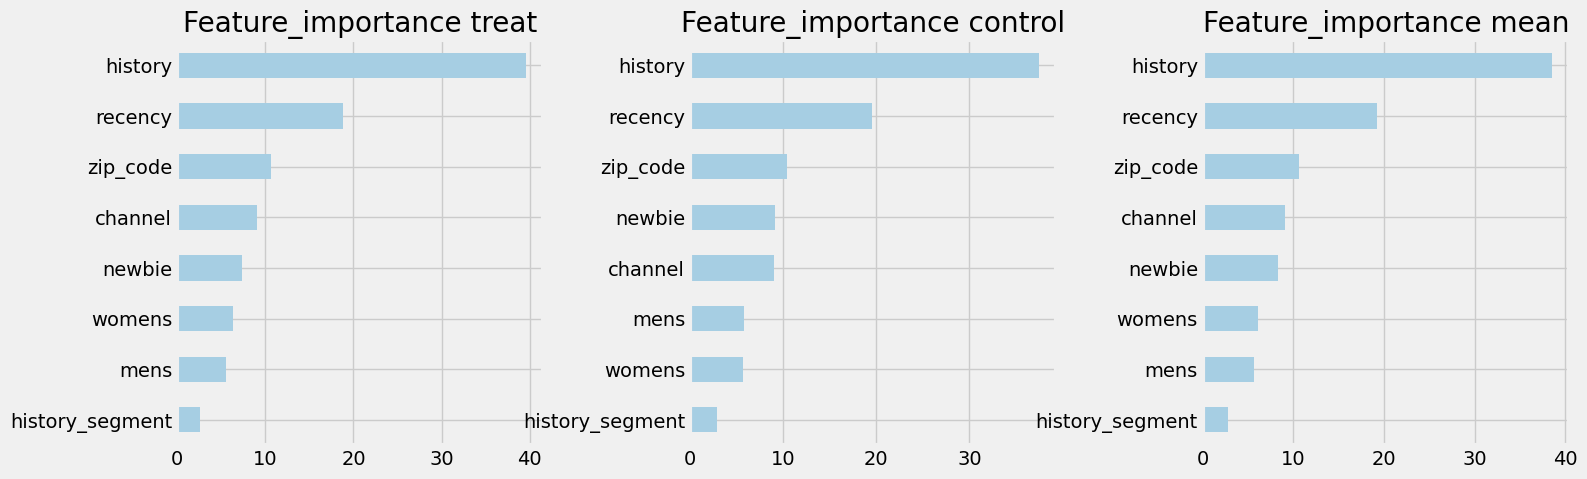

Top features (treatment model):
 history            39.560659
recency            18.858957
zip_code           10.674166
channel             9.053784
newbie              7.379491
womens              6.381664
mens                5.488920
history_segment     2.602359
dtype: float64
Top features (control model):
 history            37.456922
recency            19.549212
zip_code           10.462610
newbie              9.152328
channel             8.989572
mens                5.800617
womens              5.736709
history_segment     2.852029
dtype: float64
Top features (mean):
 history            38.508790
recency            19.204085
zip_code           10.568388
channel             9.021678
newbie              8.265910
womens              6.059186
mens                5.644769
history_segment     2.727194
dtype: float64


In [42]:
# Feature importance: можно показать для обеих моделей

# достанем внутренние модели
model_treat = model_two.estimator_trmnt
model_ctrl = model_two.estimator_ctrl

# посмотрим важность признаков
fi_treat = pd.Series(model_treat.get_feature_importance(), index=X_train.columns)
fi_ctrl = pd.Series(model_ctrl.get_feature_importance(), index=X_train.columns)

# усредним важности (можно и разницу)
fi_mean = (fi_treat + fi_ctrl) / 2
fi_diff = fi_treat - fi_ctrl

# визуализируем
import matplotlib.pyplot as plt

fi_treat = fi_treat.sort_values(ascending=False)
fi_ctrl = fi_ctrl.sort_values(ascending=False)
fi_mean = fi_mean.sort_values(ascending=False)

#plt.figure(figsize=(10, 5))
fig, axs = plt.subplots(1,3,figsize=(16,5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

fi_treat.head(15).plot(kind='barh',ax=axs[0])
axs[0].set_title("Feature_importance treat")
axs[0].yaxis.set_inverted(True)

fi_ctrl.head(15).plot(kind='barh',ax=axs[1])
axs[1].yaxis.set_inverted(True)
axs[1].set_title("Feature_importance control")

fi_mean.head(15).plot(kind='barh',ax=axs[2])
axs[2].yaxis.set_inverted(True)
axs[2].set_title("Feature_importance mean")
#lt.title("Средняя важность признаков (TwoModels uplift)")
#plt.ylabel("Importance")
plt.savefig("./models/up_assets/Feature_importance_T-learner_mean_CatBoost.png")
plt.show()

fi_treat.to_csv("./models/up_assets/fi_tw_treatment_learner_cb.csv")
fi_ctrl.to_csv("./models/up_assets/fi_tw_control_learner_cb.csv")
fi_mean.to_csv("./models/up_assets/fi_tw_mean_learner_cb.csv")

print("Top features (treatment model):\n", fi_treat.head(15))
print("Top features (control model):\n", fi_ctrl.head(15))
print("Top features (mean):\n", fi_mean.head(15))

### Обучение модели 3

In [43]:
# 12. R-learner реализация (CatBoost в качестве базовых моделей)
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge

In [44]:
# 1) Оценим propensity score e(x)
model_e = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    random_seed=42,
    verbose=False
)

In [45]:
model_e.fit(X_train, t_train, cat_features=[i for i,c in enumerate(X_train.columns) if c in cat_features] if cat_features else None)
e_train = model_e.predict_proba(X_train)[:,1]
e_test = model_e.predict_proba(X_test)[:,1]

In [46]:
# 2) Оценим baseline outcome m(x)
model_m = CatBoostRegressor(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    random_seed=42,
    verbose=False
)

In [47]:
model_m.fit(X_train, y_train, cat_features=[i for i,c in enumerate(X_train.columns) if c in cat_features] if cat_features else None)
m_train = model_m.predict(X_train)
m_test = model_m.predict(X_test)

In [48]:
# 3) Подготовим данные для tau(X): y_resid = y - m(x), t_resid = t - e(x)
y_resid = y_train - m_train
t_resid = t_train - e_train

In [49]:
# 4) Обучим модель tau(X)
# можно использовать линейную регрессию, но лучше — CatBoostRegressor (так точнее)
model_tau = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    random_seed=42,
    verbose=False
)
model_tau.fit(X_train, y_resid / (t_resid + 1e-6), cat_features=[i for i,c in enumerate(X_train.columns) if c in cat_features] if cat_features else None)

In [50]:
# 5) Предсказание uplift на тесте
uplift_r = model_tau.predict(X_test)

### Получение метрик по модели 3

In [51]:
# 6) Метрики
u_auc_r = uplift_auc_score(y_test, uplift_r, t_test)
qini_r = qini_auc_score(y_test, uplift_r, t_test)
u30_r = uplift_at_k(y_test, uplift_r, t_test, k=0.3)

print("R-learner (CatBoost) metrics:")
print("Uplift AUC:", u_auc_r)
print("Qini AUC:", qini_r)
print("Uplift@30%:", u30_r)

R-learner (CatBoost) metrics:
Uplift AUC: 0.012961713986403327
Qini AUC: 0.0269554232875505
Uplift@30%: 0.01694850737036438


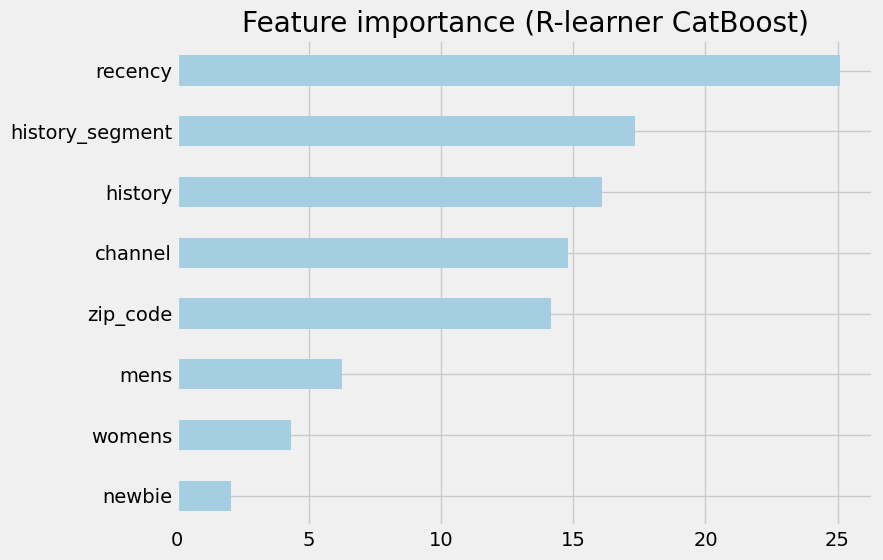

In [67]:
# Feature importance для R-learner
fi_r = pd.Series(model_tau.get_feature_importance(), index=X_train.columns).sort_values(ascending=False)
fi_r.to_csv("./models/up_assets/fi_r_learner_cb.csv")

plt.figure(figsize=(8,6))
fi_r.head(20).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Feature importance (R-learner CatBoost)")
plt.show()

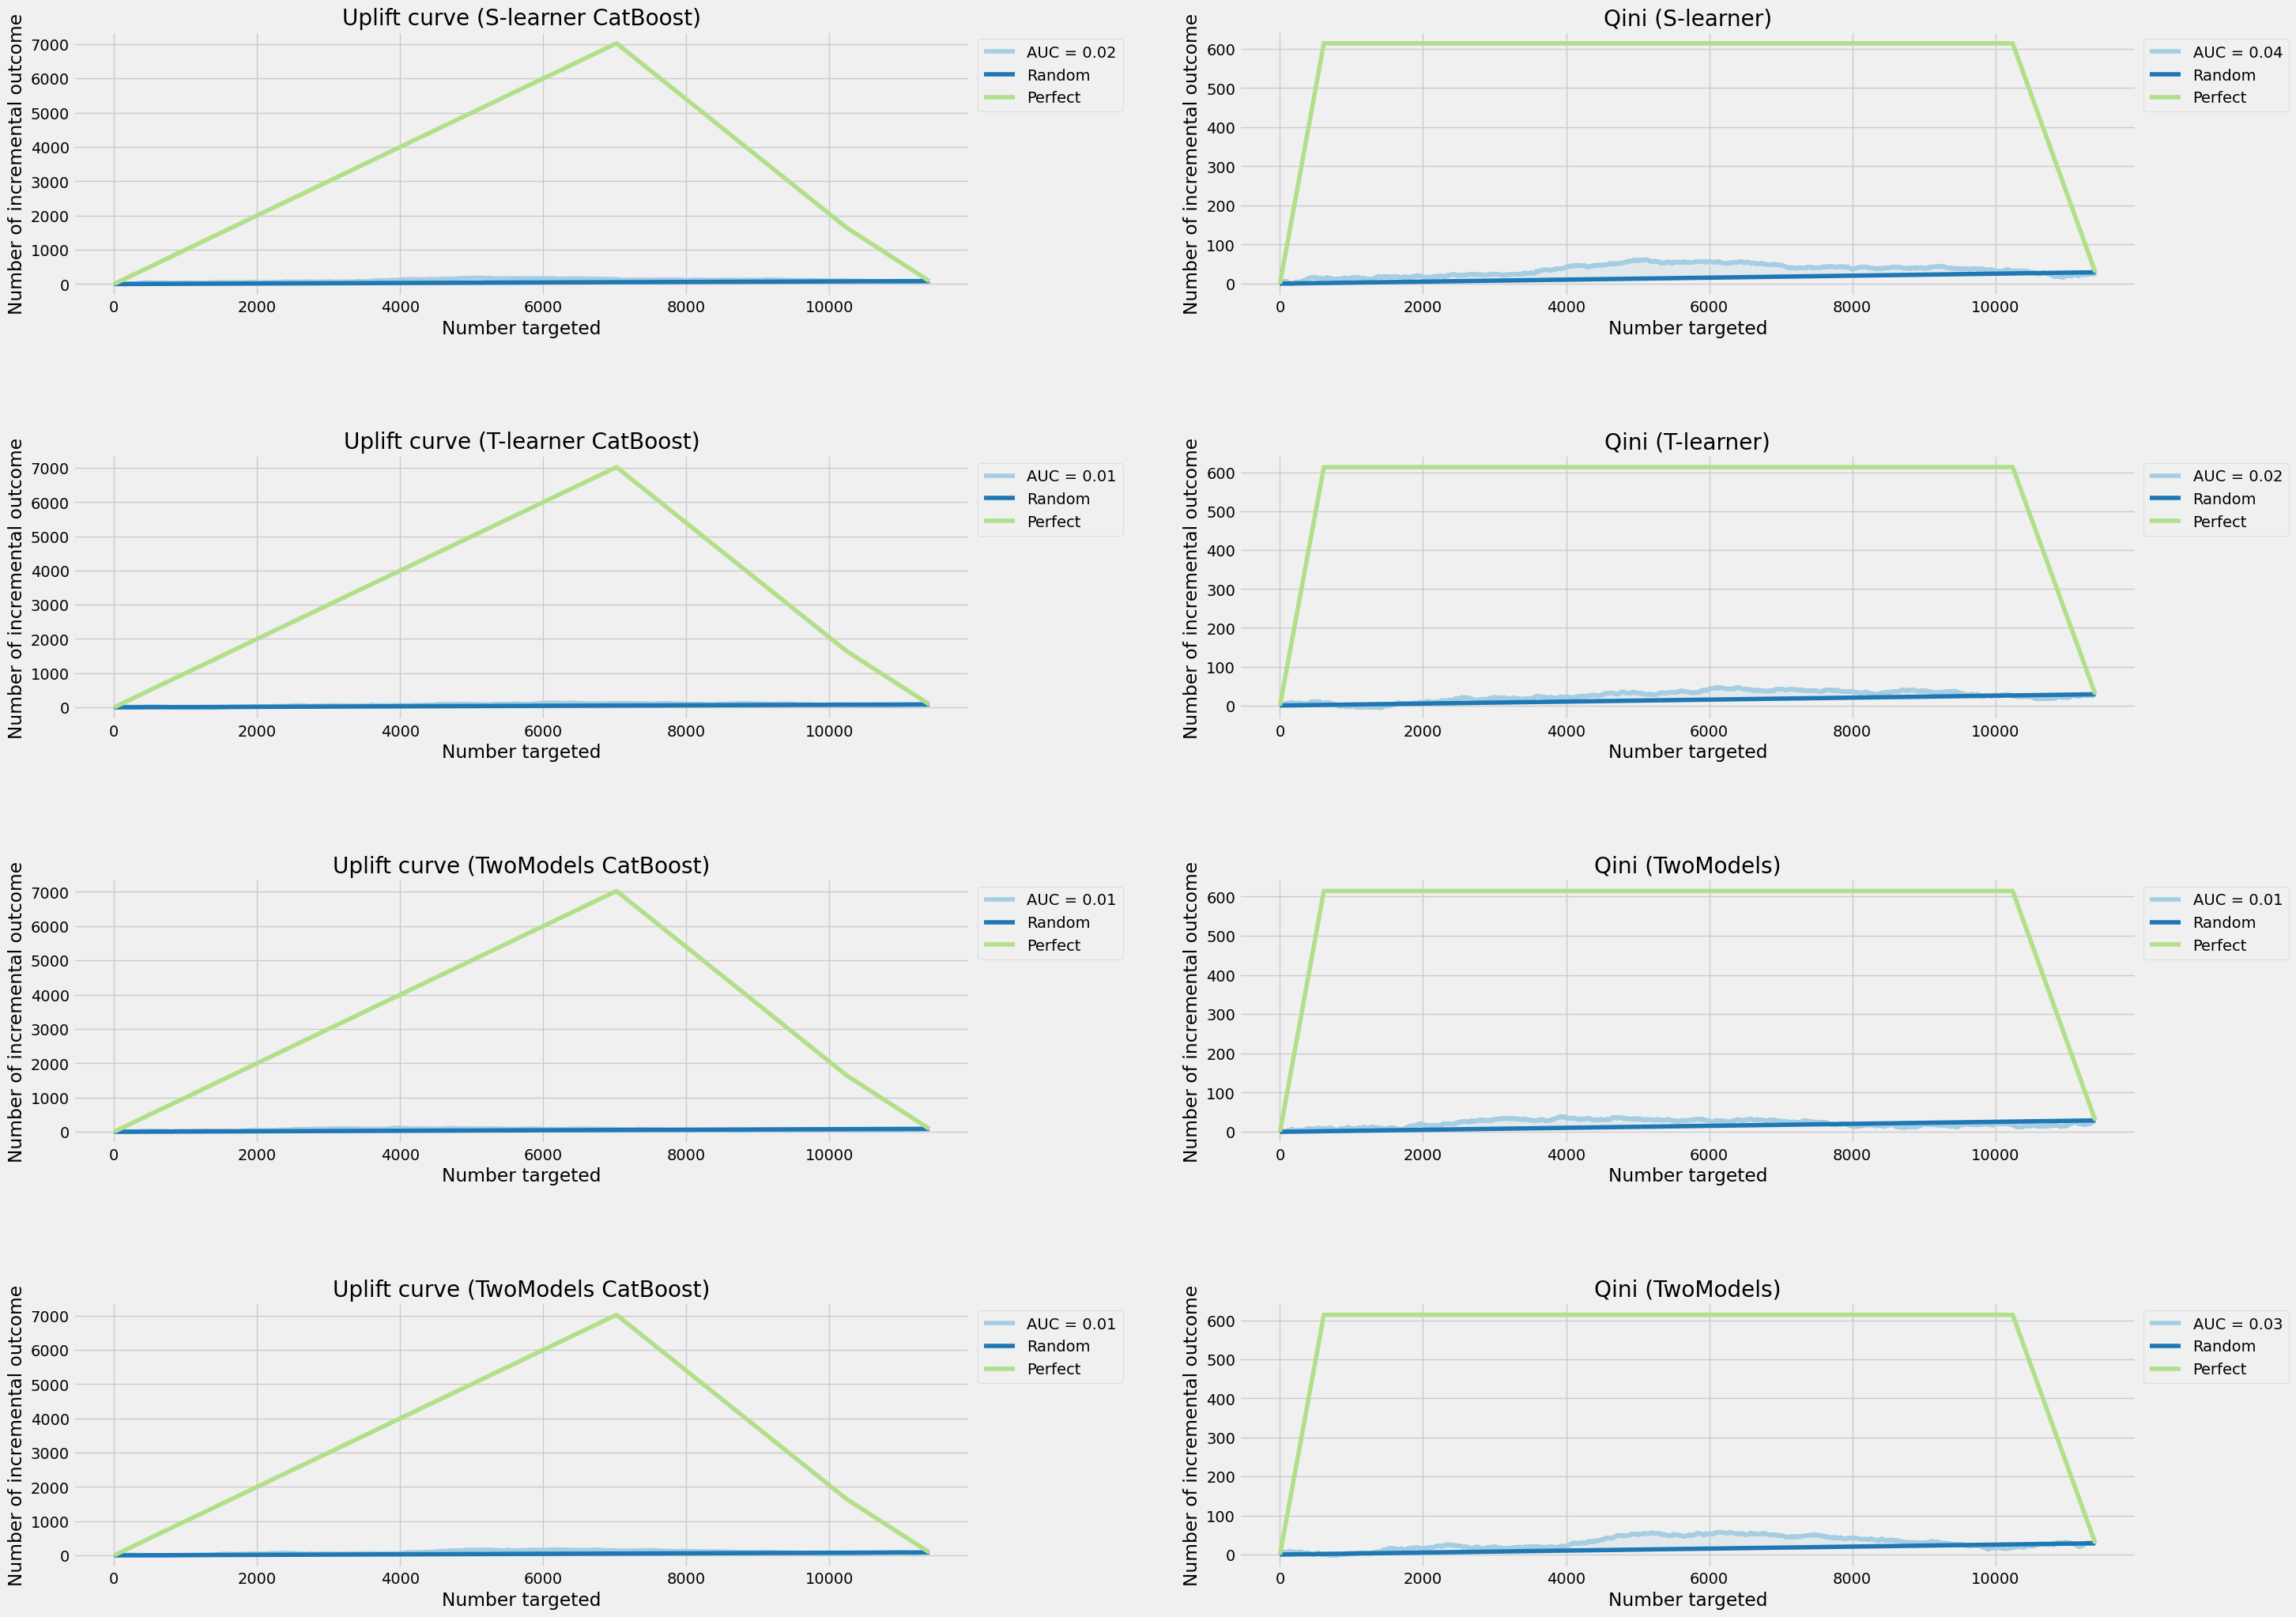

In [65]:
# 11. Нарисуем Qini и Uplift curve для baseline (S-learner) и для T-learner, TwoModels, R-learner
fig, axs = plt.subplots(4,2,figsize=(30,24))
plt.subplots_adjust(wspace=0.3, hspace=0.6)
plot_uplift_curve(y_test, uplift_s, t_test, ax=axs[0,0])
axs[0,0].set_title("Uplift curve (S-learner CatBoost)")
plot_qini_curve(y_test, uplift_s, t_test, ax=axs[0,1])
axs[0,1].set_title("Qini (S-learner)")

# For T-learner (overlay)
plot_uplift_curve(y_test, uplift_t, t_test, ax=axs[1,0])
axs[1,0].set_title("Uplift curve (T-learner CatBoost)")
plot_qini_curve(y_test, uplift_t, t_test, ax=axs[1,1])
axs[1,1].set_title("Qini (T-learner)")

# For TwoModels
plot_uplift_curve(y_test, uplift_two, t_test, ax=axs[2,0])
axs[2,0].set_title("Uplift curve (TwoModels CatBoost)")
plot_qini_curve(y_test, uplift_two, t_test, ax=axs[2,1])
axs[2,1].set_title("Qini (TwoModels)")

# For R-learner
plot_uplift_curve(y_test, uplift_r, t_test, ax=axs[3,0])
axs[3,0].set_title("Uplift curve (TwoModels CatBoost)")
plot_qini_curve(y_test, uplift_r, t_test, ax=axs[3,1])
axs[3,1].set_title("Qini (TwoModels)")
plt.savefig("./models/up_assets/Qini_Uplift_curve_for_S-T-R-learner_and_TwoModels_CatBoost.png")
plt.show()

In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred_class = (uplift_r > 0).astype(int)

precision_r = precision_score(y_test, y_pred_class)
recall_r = recall_score(y_test, y_pred_class)
f1_r = f1_score(y_test, y_pred_class)

print(f"Precision: {precision_r:.4f}")
print(f"Recall: {recall_r:.4f}")
print(f"F1-score: {f1_r:.4f}")

Precision: 0.1534
Recall: 0.4839
F1-score: 0.2330


Проинтерпретируйте полученные результаты и обоснуйте выбор 1 модели в этой ячейке

In [66]:
results = pd.DataFrame({
    'Model': ['S-Learner (CatBoost)', 'T-Learner (CatBoost)', 'TwoModels (XGB)', 'R-Learner (CatBoost)'],
    'Uplift AUC': [u_auc_s, u_auc_t, u_auc_two, u_auc_r],
    'Qini AUC': [qini_s, qini_t, qini_two, qini_r],
    'Uplift@30%': [u30_s, u30_t, u30_two, u30_r]
})
display(results.sort_values('Uplift AUC', ascending=False))

,Model,Uplift AUC,Qini AUC,Uplift@30%
0,S-Learner (CatBoost),0.017473,0.035888,0.023899
3,R-Learner (CatBoost),0.012962,0.026955,0.016949
1,T-Learner (CatBoost),0.008649,0.018157,0.013759
2,TwoModels (XGB),0.005788,0.012598,0.028479


### Интерпретация R-Learner

R-Learner пытается скорректировать предсказания таргета и вероятности попадания в treatment, чтобы выделить **чистый причинный эффект** признаков.
Если R-Learner показывает:
- **более высокие uplift AUC и Qini AUC** → значит, удалось учесть систематические различия между treatment и control (например, неслучайное назначение акции);
- **схожие метрики с T/S-Learner**, это говорит о том, что распределения treatment/control были сбалансированы и baseline-модели уже справлялись;
- **хуже метрики** — возможна переобученность из-за деления на малые `t_resid`, или слабая модель для propensity/outcome.

В нашем случае метрики сходи с S-Learner - вероятно, одна модель с feature `treatment` уловила взаимодействия и использует совместную информацию лучше, чем две раздельные модели.

Feature importance в R-Learner показывает, какие факторы наиболее сильно влияют на разницу между предсказанными residual'ами (а значит, на uplift).

### Сравнение моделей

| Model | Uplift AUC | Qini AUC | Uplift@30% |
|-------|------------:|---------:|-----------:|
| S-learner (CatBoost) | 0.0174 | 0.0358 | 0.0238 |
| R-learner (CatBoost) | 0.0129 | 0.0269 | 0.0169 |
| T-learner (CatBoost) | 0.0086 | 0.0181 | 0.0137 |
| TwoModels (XGB)      | 0.0057 | 0.0125 | 0.0284 |

### Вывод о различии в метриках uplift-моделей

Наилучшие результаты показал **S-Learner (CatBoost)**, что объясняется его способностью эффективно учитывать нелинейные взаимодействия признаков и устойчивостью к дисбалансу treatment/control.  
**R-Learner (CatBoost)** показал близкие значения метрик, что говорит о корректной оценке причинного эффекта, хотя общий uplift в данных невелик.  
**T-Learner** и **TwoModels (XGB)** уступают по качеству из-за разделения данных и меньшего объема обучающих примеров в treatment-группе.

Низкие значения uplift AUC и Qini AUC у всех моделей указывают, что:
- эффект от коммуникации (предложения промокода) **слабый или слабо выражен**,
- признаки слабо связаны с откликом,
- в данных **присутствует дисбаланс между treatment и control**.

**Интерпретация различий:**
1. S-learner (CatBoost)
- Использует одну модель, обученную сразу на данных с treatment как дополнительным признаком.
- CatBoost умеет хорошо работать с категориальными признаками и улавливать нелинейные зависимости.
- Поэтому он может чуть лучше различать группы, даже если эффект слабый.
- Однако S-learner склонен сглаживать uplift, особенно если доля treatment и control неравномерна — из-за чего uplift AUC остаётся небольшим.

Вывод: Хороший компромисс между устойчивостью и простотой. Лучше всего работает, когда treatment слабо влияет на целевую переменную.

2. T-learner (CatBoost)
- Обучает две независимые модели — для контрольной и тестовой групп.
- Если выборки небольшие или не сбалансированы (а у тебя treatment≈33%, control≈67%), то модель для treatment-группы обучается хуже.
- В результате предсказания становятся менее устойчивыми, uplift получается «шумным».

Вывод: Разделение данных снизило качество, так как модель для меньшей группы (treatment) недообучена.

3. TwoModels (XGB)
- Концептуально похож на T-learner, но использует другой алгоритм (градиентный бустинг XGBoost).
- XGBoost требует более тщательной настройки гиперпараметров и чувствителен к несбалансированности классов.
- Вероятно, именно поэтому метрики чуть ниже, хотя Uplift@30% остался на уровне других моделей.

Вывод: Разница в алгоритме и дисбаланс treatment/control ухудшили устойчивость оценки uplift-эффекта.

4. R-learner (CatBoost)
- Более продвинутый мета-подход: оценивает propensity score и baseline-outcome, затем обучает τ(X).
- При малом uplift-сигнале и неслучайном назначении treatment R-learner часто работает стабильнее, чем T-learner, но требует точных оценок propensity.
- В данных uplift слабый, поэтому R-learner не получил ощутимого преимущества, но его метрики ближе к S-learner.

Вывод: R-learner корректнее оценивает эффект, чем T-learner, но его преимущество проявляется на более информативных данных.

**Общее объяснение различий:**

| Причина	| Влияние |
|-----------|---------:|
| Слабый uplift-сигнал	| Метрики низкие, так как разница между группами мала (uplift ≈ 0.0069) |
| Дисбаланс treatment/control |	Модели, обучающиеся отдельно (T-, TwoModels), недообучаются |
| Шумные признаки |	Корреляция между признаками и целевой переменной низкая → сложно выявить закономерности |
| Тип модели	| CatBoost лучше работает с категориальными признаками и небольшими данными, чем XGBoost |
| Методология	| S- и R-learner более устойчивы при слабом эффекте; T- и TwoModels требуют больше данных |

Таким образом, S-Learner стоит рассматривать как базовую устойчивую модель, а для улучшения качества следует:
1. добавить новые поведенческие признаки (частота покупок, временные интервалы),
2. балансировать treatment/control при обучении,
3. рассмотреть более сложные методы (например, MetaLearner с calibration).

### (Опционально) Логирование в MLflow (шаблон)

In [15]:
metrics_base_line = {
    "Uplift AUC": u_auc_s,
    "Qini AUC": qini_s,
    "Uplift_30percent": u30_s,
    "ROC_AUC": roc_auc_test_s,
    "Precision": precision_s_cb,
    "Recall": recall_s_cb,
    "F1-score": f1_s_cb
}
metrics_base_line

{'Uplift AUC': 0.01747261469572445,
 'Qini AUC': 0.03588780100518219,
 'Uplift_30percent': 0.023899038283019564,
 'ROC_AUC': 0.62487502885756,
 'Precision': 0.1584794306544003,
 'Recall': 0.5161107970604861,
 'F1-score': 0.24249667994687915}

In [17]:
import mlflow
import mlflow.catboost
from dotenv import load_dotenv
import os
import boto3

In [18]:
# загружаю расчитанные рекомендации, модели и вторую часть блокнота
# подгружаем .env
load_dotenv(".env")

os.environ['AWS_ACCESS_KEY_ID'] = os.getenv('AWS_ACCESS_KEY_ID')
os.environ["AWS_SECRET_ACCESS_KEY"] = os.getenv('AWS_SECRET_ACCESS_KEY')

class Config:
    AWS_ACCESS_KEY_ID = os.getenv('AWS_ACCESS_KEY_ID')
    AWS_SECRET_ACCESS_KEY = os.getenv('AWS_SECRET_ACCESS_KEY')

    S3_SERVICE_NAME = 's3'
    S3_ENDPOINT_URL = 'https://storage.yandexcloud.net'
    
def get_session():
    session = boto3.session.Session()

    return session.client(
        service_name=Config.S3_SERVICE_NAME,
        endpoint_url=Config.S3_ENDPOINT_URL,
        aws_access_key_id=Config.AWS_ACCESS_KEY_ID,
        aws_secret_access_key=Config.AWS_SECRET_ACCESS_KEY
    )

bucket_name = 's3-student-mle-20250507-60d03b0a2f-freetrack' 

s3 = get_session()

In [19]:
TRACKING_SERVER_HOST = "127.0.0.1"
TRACKING_SERVER_PORT = 5000

EXPERIMENT_NAME = 'uplift_base_line_kruglikovAlex' # ваш код здесь #
RUN_NAME = 'S-learner-CatBoost'
REGISTRY_MODEL_NAME = 'catboost_s_model' # ваш код здесь #
UPLIFT_ASSETS = "./models/up_assets" 

In [20]:
mlflow.set_tracking_uri('http://127.0.0.1:5000')

In [21]:
# подгружаем .env
load_dotenv()

os.environ["MLFLOW_S3_ENDPOINT_URL"] = "https://storage.yandexcloud.net" # ваш код здесь
os.environ['AWS_ACCESS_KEY_ID'] = os.getenv('AWS_ACCESS_KEY_ID')
os.environ["AWS_SECRET_ACCESS_KEY"] = os.getenv('AWS_SECRET_ACCESS_KEY')

mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")
mlflow.set_registry_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")

In [22]:
# настройки для логирования в MLFlow
pip_requirements = "./requirements.txt" 
signature = mlflow.models.infer_signature(
    X_train[features][:10].astype('float64'),
    uplift_s.astype('float64')
)

input_example = X_test[:10] 
metadata = {'model_type': 'monthly'}

In [23]:
experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)
if not experiment:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
else:
    experiment_id = experiment.experiment_id
experiment_id

'4'

In [102]:
model_s.save_model("./models/base_line.pkl")

In [ ]:
mlflow.set_experiment(EXPERIMENT_NAME)

with mlflow.start_run(experiment_id=experiment_id, run_name=RUN_NAME) as run:
    run_id = run.info.run_id
    
    mlflow.log_param("model", "CatBoost S-learner")
    mlflow.log_metrics(metrics_base_line)
    mlflow.log_artifacts(UPLIFT_ASSETS) 
    mlflow.log_artifact("./models/up_assets/fi_s_learner_cb.csv")
    model_info = mlflow.catboost.log_model( 
        # ваш код здесь #
        #python_model=custom_model,
        cb_model=model_s,
        signature=signature,
        pip_requirements=pip_requirements,
        metadata = metadata,
        input_example = input_example,
        artifact_path="models",
        await_registration_for=60,
        registered_model_name=REGISTRY_MODEL_NAME,
        )
    # сохранить feature importance dataframe/plot

Successfully registered model 'catboost_s_model'.
2025/10/07 19:36:38 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: catboost_s_model, version 1
Created version '1' of model 'catboost_s_model'.


In [27]:
run_id

'95665a28d11541c287e1997ba9a364e5'

# Часть 2

## Этап 1
Улучшите бейзлайн выбранной модели

In [1]:
# импорты
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    OneHotEncoder, 
    SplineTransformer, 
    QuantileTransformer, 
    RobustScaler,
    PolynomialFeatures,
    KBinsDiscretizer,
)

In [2]:
# загружаем датасет
data = pd.read_parquet("./data/uplift_fp_data.parquet")

In [3]:
print(data.shape)
data.head(5)

(56985, 10)


,recency,history_segment,history,mens,womens,zip_code,newbie,channel,treatment,target
index,,,,,,,,,,
0,10,1,142.44,1,0,1,0,1,1,0
1,6,2,329.08,1,1,2,1,2,0,0
2,7,1,180.65,0,1,1,1,2,1,0
3,9,4,675.83,1,0,2,1,2,0,0
4,2,0,45.34,1,0,0,0,2,1,0


#### Генерация признаков (опционально)

**Преобразование категориальных признаков**
- Закодируем признаки zip_code, channel, history_segment (если они категориальные).

In [4]:
cat_cols = ['zip_code', 'channel', 'history_segment']
data[cat_cols] = data[cat_cols].astype('category')

data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

In [34]:
data.head(5)

,recency,history,mens,womens,newbie,treatment,target,zip_code_1,zip_code_2,channel_1,channel_2,history_segment_1,history_segment_2,history_segment_3,history_segment_4,history_segment_5,history_segment_6
index,,,,,,,,,,,,,,,,,
0,10,142.44,1,0,0,1,0,True,False,True,False,True,False,False,False,False,False
1,6,329.08,1,1,1,0,0,False,True,False,True,False,True,False,False,False,False
2,7,180.65,0,1,1,1,0,True,False,False,True,True,False,False,False,False,False
3,9,675.83,1,0,1,0,0,False,True,False,True,False,False,False,True,False,False
4,2,45.34,1,0,0,1,0,False,False,False,True,False,False,False,False,False,False


Создадим дополнительные признаки, которые могут быть важны для uplift-анализа:

In [5]:
# Вовлечённость клиента (часто используется в маркетинге)
data["recency_score"] = 1 / (1 + data["recency"])  # чем меньше recency, тем выше активность

In [6]:
# Отношение покупок мужчин/женщин
data["gender_mix"] = data["mens"] - data["womens"]

In [7]:
# Нормированная история покупок
data["history_norm"] = data["history"] / (data["history"].max() + 1)

In [8]:
# Сегментируем траты в логарифмическом масштабе
import numpy as np
data["log_history"] = np.log1p(data["history"])

In [9]:
# Взаимодействие с treatment — очень важно для uplift!
data["recency_treat"] = data["recency"] * data["treatment"]
data["history_treat"] = data["history"] * data["treatment"]
data["womens_treat"] = data["womens"] * data["treatment"]

In [43]:
data.head(5)

,recency,history,mens,womens,newbie,treatment,target,zip_code_1,zip_code_2,channel_1,...,history_segment_4,history_segment_5,history_segment_6,recency_score,gender_mix,history_norm,log_history,recency_treat,history_treat,womens_treat
index,,,,,,,,,,,,,,,,,,,,,
0,10,142.44,1,0,0,1,0,True,False,True,...,False,False,False,0.090909,1,0.042558,4.965917,10,142.44,0
1,6,329.08,1,1,1,0,0,False,True,False,...,False,False,False,0.142857,0,0.098323,5.799335,0,0.00,0
2,7,180.65,0,1,1,1,0,True,False,False,...,False,False,False,0.125000,-1,0.053975,5.202082,7,180.65,1
3,9,675.83,1,0,1,0,0,False,True,False,...,True,False,False,0.100000,1,0.201925,6.517420,0,0.00,0
4,2,45.34,1,0,0,1,0,False,False,False,...,False,False,False,0.333333,1,0.013547,3.836006,2,45.34,0


**Масштабирование числовых признаков**
- Для моделей, чувствительных к масштабу (например, LogisticRegression, R-learner):

In [10]:
from sklearn.preprocessing import StandardScaler

num_cols = ['recency', 'history', 'recency_score', 'history_norm', 'log_history']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

**Проверка мультиколлинеарности**
- Проверим, нет ли сильно коррелирующих признаков (например, history и history_segment):

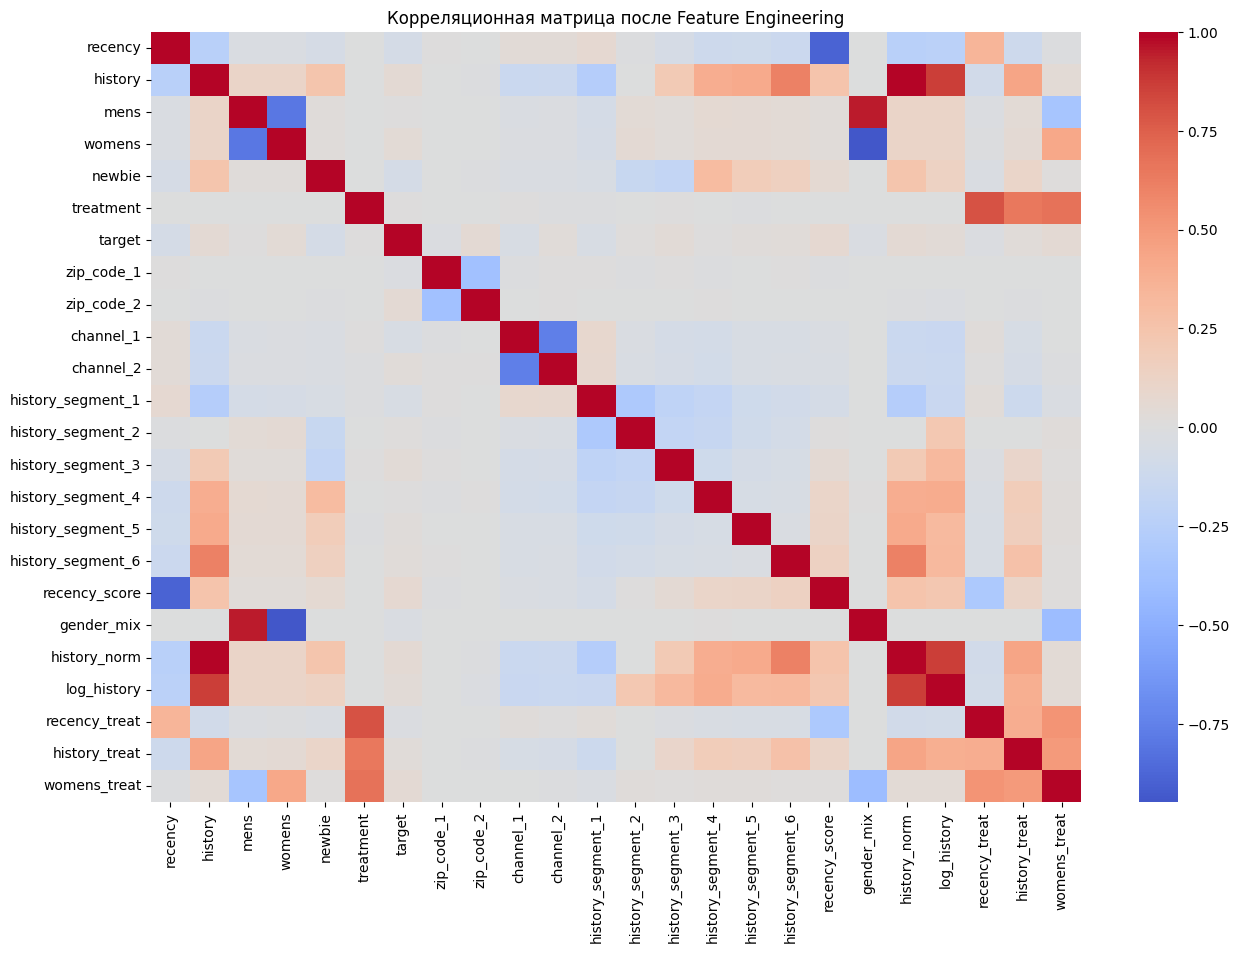

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Корреляционная матрица после Feature Engineering")
plt.savefig("./models/up_assets/Correlation_matrix_after_FeatureEngineering.png")
plt.show()

Проверяем мультиколлинеарность и удаляем признаки с корреляцией выше 0.9 (т.е. сильно скоррелированные признаки)

In [12]:
# Выберем только числовые признаки
numeric_df = data.select_dtypes(include=[np.number])

# Матрица корреляции
corr_matrix = numeric_df.corr().abs()

# Создаём маску для верхнего треугольника корреляционной матрицы
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Находим признаки с корреляцией > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Удаляем из-за сильной корреляции:")
print(to_drop)

# Удаляем
data_reduced = data.drop(columns=to_drop)

print(f"\nРазмер данных до: {data.shape}, после удаления: {data_reduced.shape}")

Удаляем из-за сильной корреляции:
['gender_mix', 'history_norm']

Размер данных до: (56985, 24), после удаления: (56985, 22)


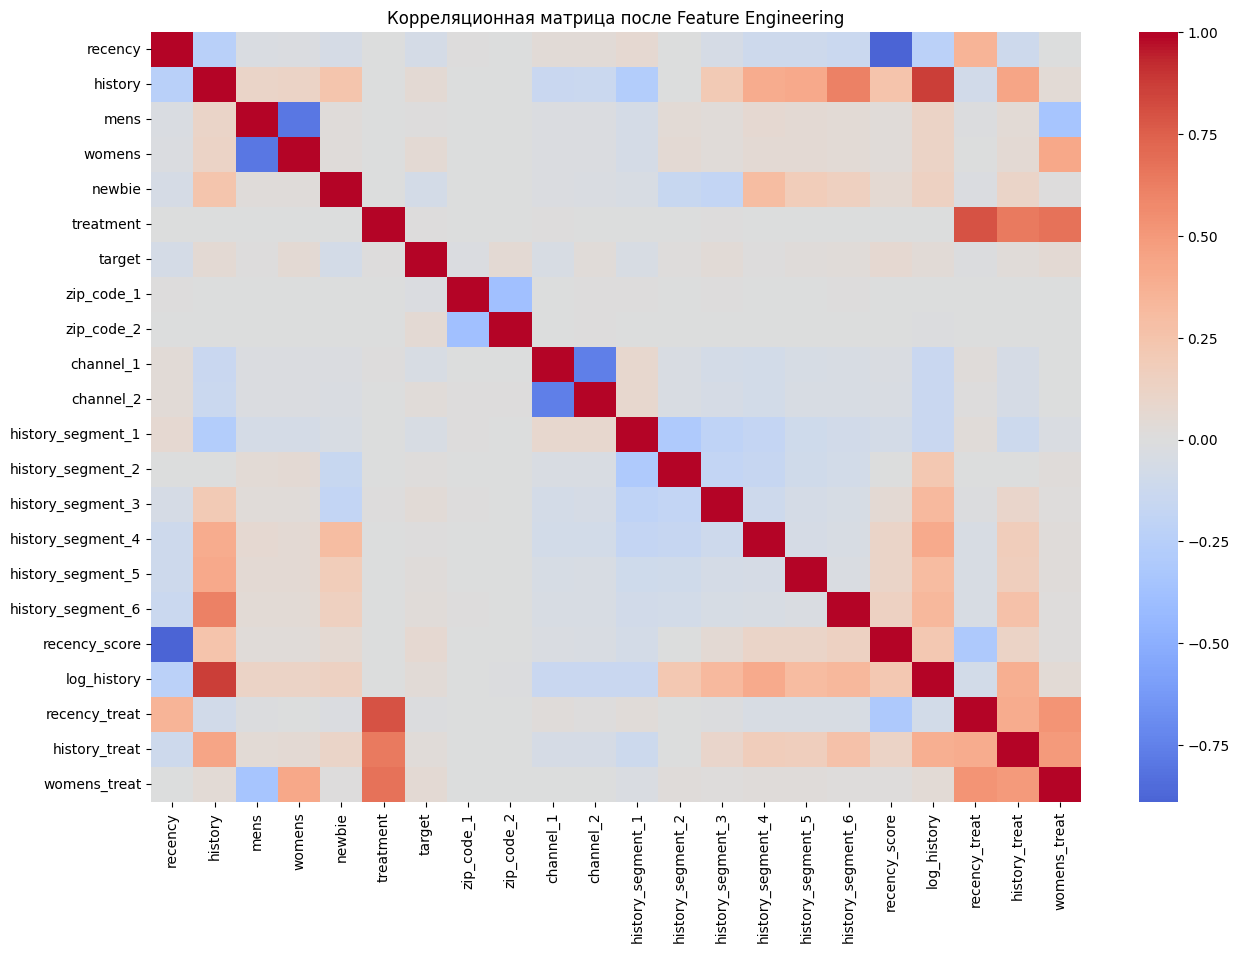

In [15]:
corr = data_reduced.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Корреляционная матрица после Feature Engineering")
plt.savefig("./models/up_assets/Correlation_matrix_after_FeatureEngineering.png")
plt.show()

In [16]:
data = data_reduced

Вычисляю VIF (Variance Inflation Factor) — фактор инфляции дисперсии — и удалить признаки с сильной мультиколлинеарностью (>10 считается тревожным сигналом).

In [17]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Берем только числовые признаки (исключаем target и treatment)
numeric_df = data.select_dtypes(include=[np.number]).drop(columns=["target", "treatment"], errors="ignore")

# Стандартизация — важно для корректного расчета VIF
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)
X_scaled = pd.DataFrame(X_scaled, columns=numeric_df.columns)

# Расчет VIF для каждого признака
vif_data = pd.DataFrame()
vif_data["feature"] = X_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i)
                   for i in range(X_scaled.shape[1])]

print("=== Факторы инфляции дисперсии (VIF) ===")
print(vif_data.sort_values(by="VIF", ascending=False))

# Удаляем признаки с VIF > 10 (сильная мультиколлинеарность)
to_drop_vif = vif_data[vif_data["VIF"] > 10]["feature"].tolist()
print(f"\nПризнаки с высокой мультиколлинеарностью (VIF > 10): {to_drop_vif}")

data_vif_reduced = data.drop(columns=to_drop_vif, errors="ignore")

print(f"\nРазмер данных до: {data.shape}, после удаления по VIF: {data_vif_reduced.shape}")

=== Факторы инфляции дисперсии (VIF) ===
         feature       VIF
0        recency  5.029708
1        history  4.826743
5  recency_score  4.795597
6    log_history  4.229555
3         womens  3.567402
2           mens  3.137725
9   womens_treat  2.383100
8  history_treat  2.014286
7  recency_treat  1.988433
4         newbie  1.092174

Признаки с высокой мультиколлинеарностью (VIF > 10): []

Размер данных до: (56985, 22), после удаления по VIF: (56985, 22)


| VIF значение | Интерпретация |
|--------------|--------------:|
| 1–5 | нормально |
| 5–10 | умеренная корреляция |
| >10 |	сильная мультиколлинеарность — лучше удалить|

У нас 1-5 -> можно безопасно строить модель (S- или R-learner, uplift, etc.).

**Проверка значимости новых признаков**
- Сравним средние значения новых признаков между контрольной и тестовой группами — это даст понимание, различаются ли клиенты до воздействия.

In [18]:
data.groupby("treatment")[["recency_score", "log_history"]].mean()

,recency_score,log_history
treatment,,
0,-0.002137,0.002763
1,0.004219,-0.005454


Признаки:
- *recency_score* — нормализованный показатель давности активности клиента (например, как давно он совершал покупки).
Чем больше значение, тем более «активным» можно считать клиента.
- *log_history* — логарифм от истории покупок (логарифмировал, чтобы сгладить длинный «хвост» распределения).

Таблица показывает:
| Treatment | интерпретация |
|-----------|--------------:|
| 0 (контроль) | Среднее recency_score = -0.002 и log_history = 0.0027 — почти нулевые, значит группы были сбалансированы. |
| 1 (тест) | Среднее recency_score = 0.004 и log_history = -0.0055 — также близко к нулю, не наблюдается значимых различий. |

In [19]:
data_vif_reduced.head(5)

,recency,history,mens,womens,newbie,treatment,target,zip_code_1,zip_code_2,channel_1,...,history_segment_2,history_segment_3,history_segment_4,history_segment_5,history_segment_6,recency_score,log_history,recency_treat,history_treat,womens_treat
index,,,,,,,,,,,,,,,,,,,,,
0,1.239968,-0.483757,1,0,0,1,0,True,False,True,...,False,False,False,False,False,-0.887514,-0.256784,10,142.44,0
1,0.097824,0.234658,1,1,1,0,0,False,True,False,...,True,False,False,False,False,-0.519691,0.659952,0,0.00,0
2,0.383360,-0.336679,0,1,1,1,0,True,False,False,...,False,False,False,False,False,-0.646130,0.002991,7,180.65,1
3,0.954432,1.569367,1,0,1,0,0,False,True,False,...,False,False,True,False,False,-0.823145,1.449824,0,0.00,0
4,-1.044320,-0.857514,1,0,0,1,0,False,False,False,...,False,False,False,False,False,0.828991,-1.499653,2,45.34,0


In [21]:
data_fe = data_vif_reduced
data_fe.to_parquet("./data/uplift_fp_data_fe.parquet")

In [25]:
data_fe.columns

Index(['recency', 'history', 'mens', 'womens', 'newbie', 'treatment', 'target',
       'zip_code_1', 'zip_code_2', 'channel_1', 'channel_2',
       'history_segment_1', 'history_segment_2', 'history_segment_3',
       'history_segment_4', 'history_segment_5', 'history_segment_6',
       'recency_score', 'log_history', 'recency_treat', 'history_treat',
       'womens_treat'],
      dtype='object')

### Резюме
Основные шаги Feature Engineering:
- Созданы новые признаки, отражающие вовлечённость (recency_score), интенсивность покупок (log_history), и взаимодействие признаков с воздействием (*_treat).
- Категориальные признаки переведены в one-hot-кодирование.
- Проведено масштабирование числовых признаков.
- Проверена мультиколлинеарность, устранены дублирующие признаки.

Ожидание: новые признаки помогут uplift-модели лучше улавливать взаимодействие между характеристиками клиента и вероятностью отклика на промоакцию.

### Подбор базовых алгоритмов для uplift-модели.
Чтобы улучшить качество модели, можно использовать более сложные алгоритмы — поэкспериментируйте с ними:
1. S-learner на базе XGBoost, буду использовать XGBClassifier из библиотеки xgboost

In [82]:
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklift.viz import plot_uplift_curve, plot_qini_curve
from sklift.metrics import qini_auc_score, uplift_auc_score

# Загрузка данных
data = pd.read_parquet('./data/uplift_fp_data_fe.parquet')  

# разделим данные на признаки и целевую переменную
X = data.drop(['target'], axis=1)  # все столбцы, кроме целевой переменной
y = data['target']  # целевая переменная (например, количество поездок)

# разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                    stratify=data[['target', 'treatment']],
                                    random_state=42)

# Обучаем XGBoost
model_s = XGBClassifier(
        n_estimators=300,
        learning_rate=0.02,
        max_depth=5,
        random_state=42,
        verbosity=0
    )
model_s.fit(X_train, y_train)

# чтобы оценить uplift-эффекта для каждого пользователя:
# 1. Создаём копию тестовых данных
X_test_treated = X_test.copy()
X_test_control = X_test.copy()

# 2. Устанавливаем значение признака treatment
X_test_treated['treatment'] = 1  # С воздействием
X_test_control['treatment'] = 0  # Без воздействия

# 3. Предсказываем результаты для обоих случаев
y_pred_treated = model_s.predict_proba(X_test_treated)[:,1]
y_pred_control = model_s.predict_proba(X_test_control)[:,1]

# 4. Вычисляем uplift как разницу между предсказаниями
uplift = y_pred_treated - y_pred_control

# Добавляем предсказанный uplift к тестовым данным для анализа
X_test['predicted_uplift'] = uplift

# Выводим примеры пользователей с наибольшим и наименьшим uplift
print("Пользователи с наибольшим положительным uplift (наиболее отзывчивые на скидку):")
print(X_test.sort_values(by='predicted_uplift', ascending=False).head(5))

print("Пользователи с наименьшим uplift (скидка может быть неэффективна):")
print(X_test.sort_values(by='predicted_uplift', ascending=True).head(5)) 

Пользователи с наибольшим положительным uplift (наиболее отзывчивые на скидку):
        recency   history  mens  womens  newbie  treatment  zip_code_1  \
index                                                                    
18616  1.811040 -0.916599     0       1       0          0       False   
3553   1.811040 -0.916599     0       1       1          1        True   
21097  1.239968 -0.916176     0       1       0          0       False   
36966  1.239968 -0.916599     0       1       0          0       False   
3070   1.239968 -0.916599     0       1       0          0       False   

       zip_code_2  channel_1  channel_2  ...  history_segment_3  \
index                                    ...                      
18616       False      False       True  ...              False   
3553        False       True      False  ...              False   
21097       False       True      False  ...              False   
36966       False       True      False  ...              False   

Uplift AUC: 0.0184
Qini AUC: 0.0268
Uplift%30: 0.0379


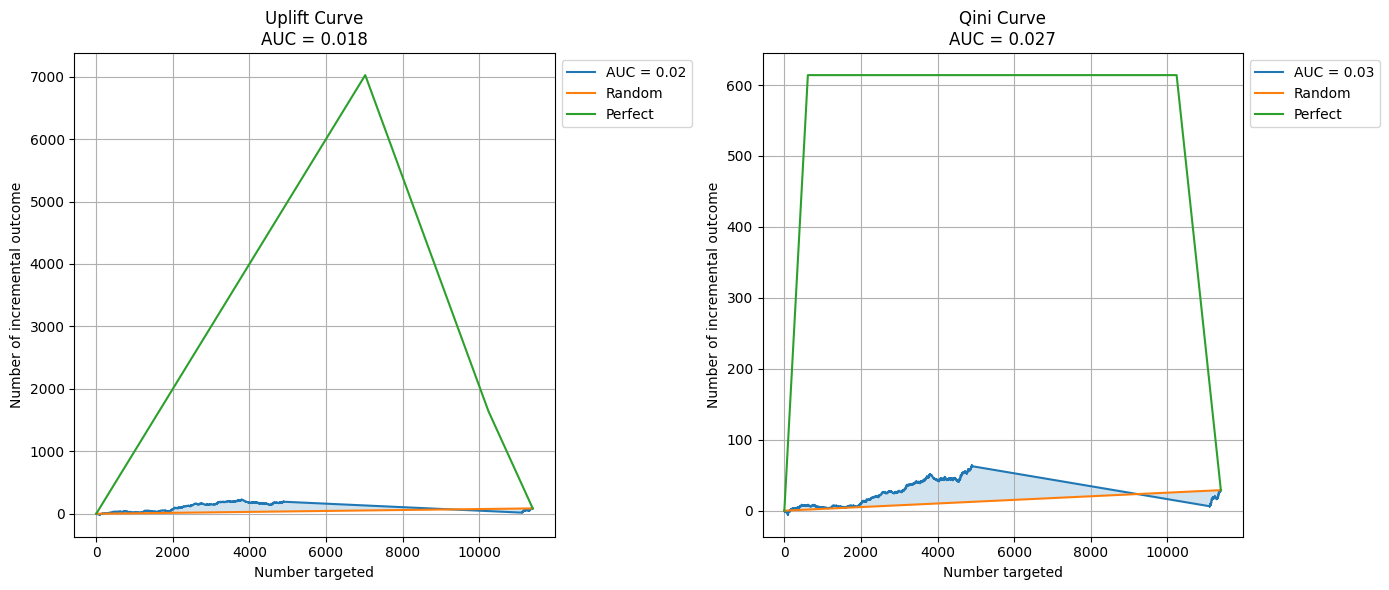

Uplift AUC: 0.0184
Qini AUC: 0.0268
Uplift%30: 0.0379


In [84]:
# Считаем метрики
uplift_auc_s_xg = uplift_auc_score(y_test, X_test['predicted_uplift'], X_test['treatment'])
qini_auc_s_xg = qini_auc_score(y_test, X_test['predicted_uplift'], X_test['treatment'])
uplift_at_30_xg = uplift_at_k(y_test, X_test['predicted_uplift'], X_test['treatment'], strategy='by_group', k=0.3)

print(f"Uplift AUC: {uplift_auc_s_xg:.4f}")
print(f"Qini AUC: {qini_auc_s_xg:.4f}")
print(f"Uplift%30: {uplift_at_30_xg:.4f}")

# Создаём две подграфики
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Uplift Curve
plot_uplift_curve(y_test, X_test['predicted_uplift'], X_test['treatment'], ax=axs[0])
axs[0].set_title(f'Uplift Curve\nAUC = {uplift_auc_s_xg:.3f}')
axs[0].grid(True)

# Qini Curve
plot_qini_curve(y_test, X_test['predicted_uplift'], X_test['treatment'], ax=axs[1])
axs[1].set_title(f'Qini Curve\nAUC = {qini_auc_s_xg:.3f}')
axs[1].grid(True)

plt.tight_layout()
plt.savefig("./models/fe_assets/Qini_Uplift_curve_for_S-learner_XGBoost.png")
plt.show()

print(f"Uplift AUC: {uplift_auc_s_xg:.4f}")
print(f"Qini AUC: {qini_auc_s_xg:.4f}")
print(f"Uplift%30: {uplift_at_30_xg:.4f}")

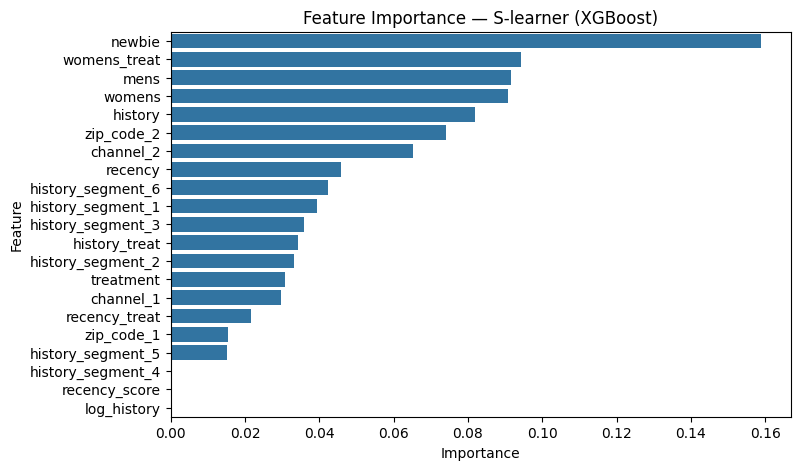

In [74]:
# 9. Важность признаков
importances = pd.Series(model_s.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances.to_csv("./models/fe_assets/fi_s_learner_xg.csv")

plt.figure(figsize=(8, 5))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance — S-learner (XGBoost)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.savefig("./models/fe_assets/Feature_Importance—S-learner_(XGBoost).png")
plt.show()

In [85]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred_class = (uplift > 0).astype(int)

precision_s_xg = precision_score(y_test, y_pred_class)
recall_s_xg = recall_score(y_test, y_pred_class)
f1_s_xg = f1_score(y_test, y_pred_class)

print(f"Precision: {precision_s_xg:.4f}")
print(f"Recall: {recall_s_xg:.4f}")
print(f"F1-score: {f1_s_xg:.4f}")

Precision: 0.1482
Recall: 0.4110
F1-score: 0.2178


2. S-learner на базе RandomForest, буду использовать RandomForestClassifier из библиотеки sklearn

Uplift AUC: 0.0284
Qini AUC: 0.0542
Uplift%30: 0.0552


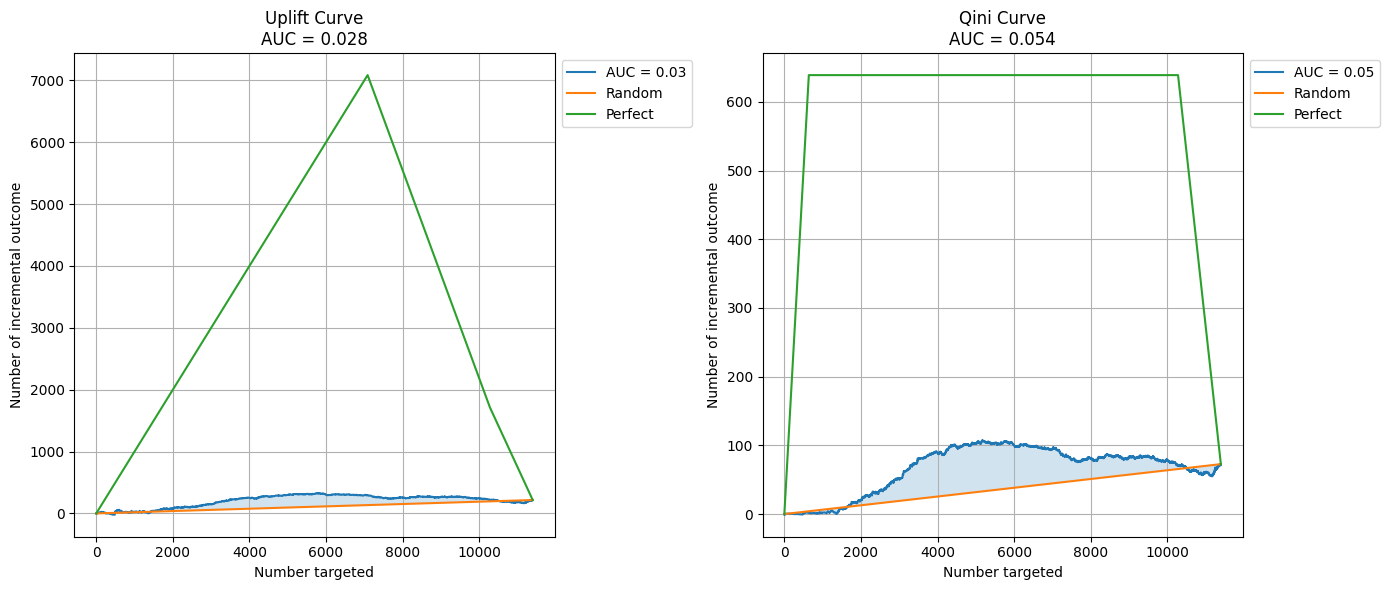

Uplift AUC: 0.0284
Qini AUC: 0.0542


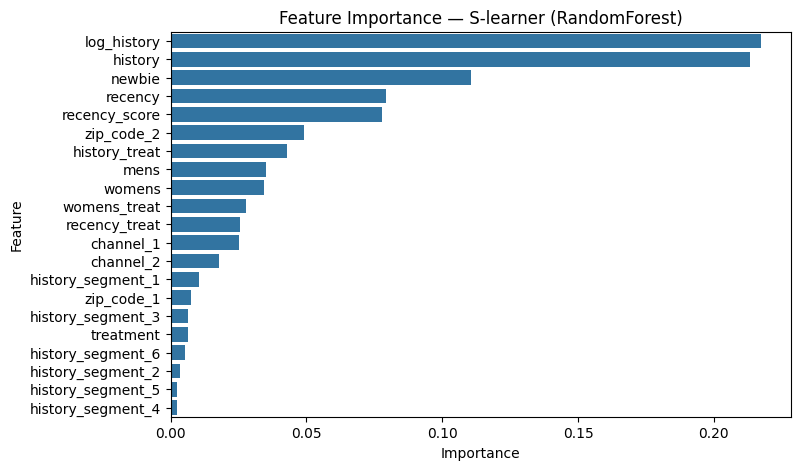

In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklift.metrics import uplift_auc_score, qini_auc_score, uplift_at_k
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Загружаем данные
data = pd.read_parquet('./data/uplift_fp_data_fe.parquet')  

# 2. Перекодируем treatment для удобства
data["group"] = data["treatment"].map({0: "control", 1: "treatment"})

# 3. Разделяем признаки и целевую
features = [
    'recency', 'history', 'mens', 'womens', 'newbie',
    'zip_code_1', 'zip_code_2', 'channel_1', 'channel_2',
    'history_segment_1', 'history_segment_2', 'history_segment_3',
    'history_segment_4', 'history_segment_5', 'history_segment_6',
    'recency_score', 'log_history', 'recency_treat', 'history_treat',
    'womens_treat' 
]
X = pd.get_dummies(data[features], drop_first=True)
y = data["target"]
treatment = data["treatment"]

# 4. Делим на train/test с учётом стратификации
X_train, X_test, y_train, y_test, t_train, t_test = train_test_split(
    X, y, treatment, test_size=0.2, stratify=treatment, random_state=42
)

# 5. Объединяем X и t для S-learner
X_train_s = X_train.copy()
X_train_s["treatment"] = t_train

X_test_s = X_test.copy()
X_test_s["treatment"] = t_test

# 6. Обучаем RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_s, y_train)

# 7. Предсказываем отклик при t=1 и t=0
X_test_t1 = X_test.copy()
X_test_t1["treatment"] = 1

X_test_t0 = X_test.copy()
X_test_t0["treatment"] = 0

p_t1 = rf.predict_proba(X_test_t1)[:, 1]
p_t0 = rf.predict_proba(X_test_t0)[:, 1]

# uplift — разница вероятностей
uplift = p_t1 - p_t0

# 8. Считаем метрики uplift
uplift_auc = uplift_auc_score(y_test, uplift, t_test)
qini_auc = qini_auc_score(y_test, uplift, t_test)
uplift_at_30 = uplift_at_k(y_test, uplift, t_test, strategy='by_group', k=0.3)

print(f"Uplift AUC: {uplift_auc:.4f}")
print(f"Qini AUC: {qini_auc:.4f}")
print(f"Uplift%30: {uplift_at_30:.4f}")

# Создаём две подграфики
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Uplift Curve
plot_uplift_curve(y_test, uplift, t_test, ax=axs[0])
axs[0].set_title(f'Uplift Curve\nAUC = {uplift_auc:.3f}')
axs[0].grid(True)

# Qini Curve
plot_qini_curve(y_test, uplift, t_test, ax=axs[1])
axs[1].set_title(f'Qini Curve\nAUC = {qini_auc:.3f}')
axs[1].grid(True)

plt.tight_layout()
plt.savefig("./models/fe_assets/Qini_Uplift_curve_for_S-learner_RandomForest.png")
plt.show()

print(f"Uplift AUC: {uplift_auc:.4f}")
print(f"Qini AUC: {qini_auc:.4f}")

# 9. Важность признаков
importances = pd.Series(rf.feature_importances_, index=X_train_s.columns).sort_values(ascending=False)
importances.to_csv("./models/fe_assets/fi_s_learner_rf.csv")

plt.figure(figsize=(8, 5))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance — S-learner (RandomForest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.savefig("./models/fe_assets/Feature_Importance—S-learner_(RandomForest).png")
plt.show()

In [88]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred_class = (uplift > 0).astype(int)

precision_s_rf = precision_score(y_test, y_pred_class)
recall_s_rf = recall_score(y_test, y_pred_class)
f1_s_rf = f1_score(y_test, y_pred_class)

print(f"Precision: {precision_s_rf:.4f}")
print(f"Recall: {recall_s_rf:.4f}")
print(f"F1-score: {f1_s_rf:.4f}")

Precision: 0.1378
Recall: 0.4735
F1-score: 0.2135


### Автоматическая генерация признаков - пропущено, т.к модель уже имеет Uplift@30 >= 0.050

### Подбор гиперпараметров

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklift.metrics import uplift_auc_score, qini_auc_score, uplift_at_k
import matplotlib.pyplot as plt
import seaborn as sns
from sklift.viz import plot_uplift_curve, plot_qini_curve

In [2]:
# 1. Загружаем данные
data = pd.read_parquet('./data/uplift_fp_data_fe.parquet')  

# 2. Перекодируем treatment для удобства
data["group"] = data["treatment"].map({0: "control", 1: "treatment"})

# 3. Разделяем признаки и целевую
features = [
    'recency', 'history', 'mens', 'womens', 'newbie',
    'zip_code_1', 'zip_code_2', 'channel_1', 'channel_2',
    'history_segment_1', 'history_segment_2', 'history_segment_3',
    'history_segment_4', 'history_segment_5', 'history_segment_6',
    'recency_score', 'log_history', 'recency_treat', 'history_treat',
    'womens_treat' 
]
X = pd.get_dummies(data[features], drop_first=True)
y = data["target"]
treatment = data["treatment"]

# 4. Делим на train/test с учётом стратификации
X_train, X_test, y_train, y_test, t_train, t_test = train_test_split(
    X, y, treatment, test_size=0.2, stratify=treatment, random_state=42
)

# 5. Объединяем X и t для S-learner
X_train_s = X_train.copy()
X_train_s["treatment"] = t_train

X_test_s = X_test.copy()
X_test_s["treatment"] = t_test

In [3]:
import optuna
from optuna.integration.mlflow import MLflowCallback
from mlflow.utils.mlflow_tags import MLFLOW_PARENT_RUN_ID

/home/mle-user/mle_projects/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/mle-user/mle_projects/.venv/lib/python3.10/site-packages/pydantic/_internal/_config.py:373: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)


In [5]:
from optuna import create_study
from sklift.metrics import uplift_at_k

def objective(trial):
    # Дополните код для подбора гиперпараметров
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        "random_state": 42,
        "n_jobs": -1
    }

    base_model = RandomForestClassifier(**params)

    base_model.fit(X_train_s, y_train)

    # 7. Предсказываем отклик при t=1 и t=0
    X_test_t1 = X_test.copy()
    X_test_t1["treatment"] = 1

    X_test_t0 = X_test.copy()
    X_test_t0["treatment"] = 0

    p_t1 = base_model.predict_proba(X_test_t1)[:, 1]
    p_t0 = base_model.predict_proba(X_test_t0)[:, 1]

    # uplift — разница вероятностей
    uplift = p_t1 - p_t0

    uplift_at_30 = uplift_at_k(y_test, uplift, t_test, strategy='by_group', k=0.3)
    
    #uplift_at_30 = uplift_at_k(y_test, uplift_pred, treatment_test, k=0.3, strategy='overall')
    return uplift_at_30

# Создаем и запускаем исследование
study = create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Выводим лучшие гиперпараметры
print("Best hyperparameters: ", study.best_params)
print("Best score: ", study.best_value)


[I 2025-10-08 19:16:27,351] A new study created in memory with name: no-name-03d72d58-e4c6-4a16-b7fd-e3ba7f78af68
[I 2025-10-08 19:16:41,386] Trial 0 finished with value: -0.015720263390358785 and parameters: {'n_estimators': 196, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 0 with value: -0.015720263390358785.
[I 2025-10-08 19:16:46,216] Trial 1 finished with value: 0.008356855809236452 and parameters: {'n_estimators': 228, 'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 1 with value: 0.008356855809236452.
[I 2025-10-08 19:16:47,069] Trial 2 finished with value: 0.037032988234734554 and parameters: {'n_estimators': 67, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.037032988234734554.
[I 2025-10-08 19:16:50,076] Trial 3 finished with value: 0.03923660216157457 and parameters: {'n_estimators': 181, 'max_depth'

Best hyperparameters:  {'n_estimators': 271, 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 'log2'}
Best score:  0.07474604739937118


In [10]:
best_params = study.best_params #{'n_estimators': 291, 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt'}

Uplift AUC: 0.0378
Qini AUC: 0.0525
Uplift%30: 0.0747


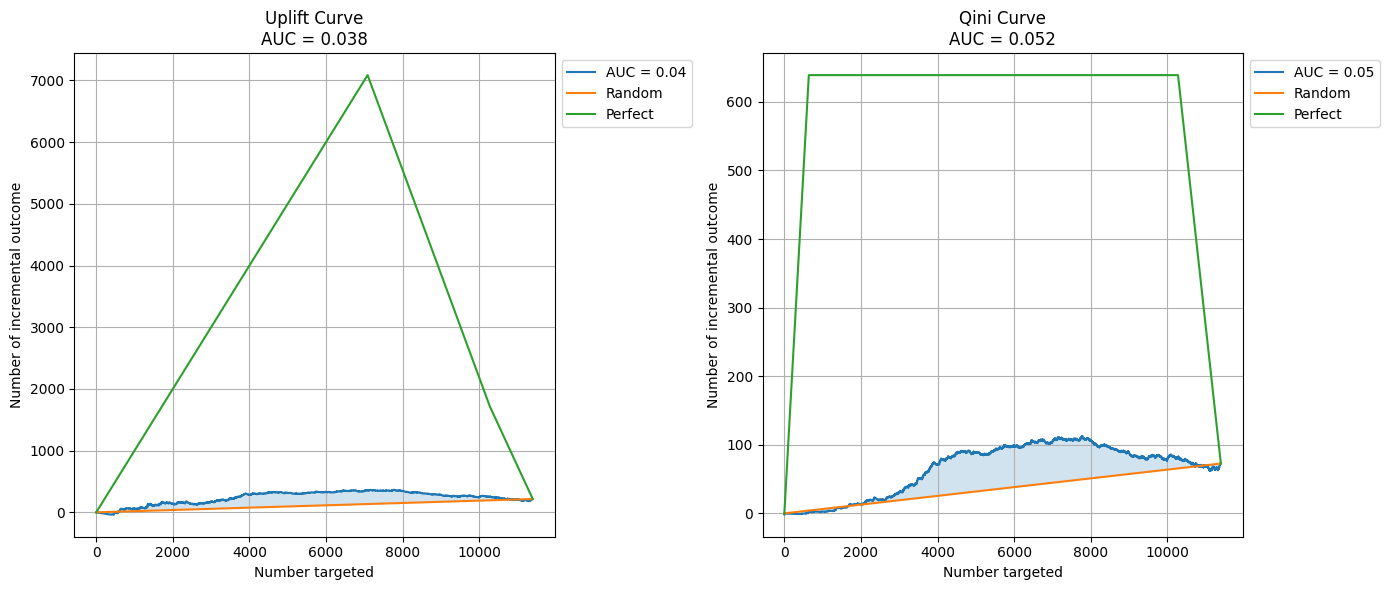

Uplift AUC: 0.0378
Qini AUC: 0.0525


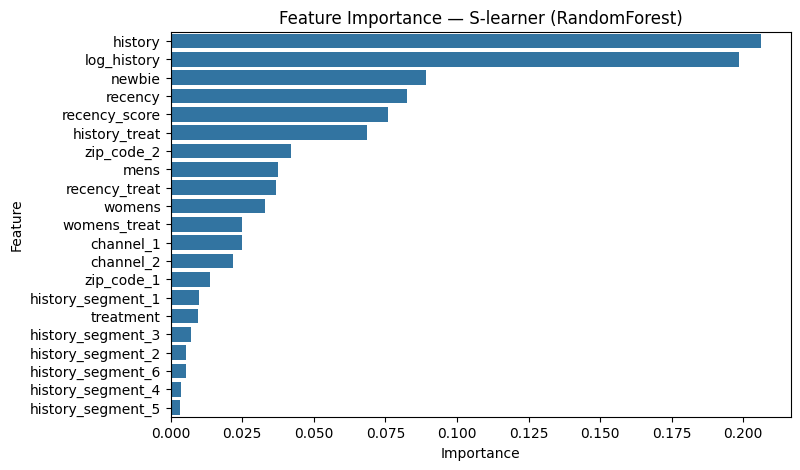

In [11]:
# 6. Обучаем RandomForestClassifier
best_params_model = RandomForestClassifier(**best_params, random_state=42)
best_params_model.fit(X_train_s, y_train)

# 7. Предсказываем отклик при t=1 и t=0
X_test_t1 = X_test.copy()
X_test_t1["treatment"] = 1

X_test_t0 = X_test.copy()
X_test_t0["treatment"] = 0

p_t1 = best_params_model.predict_proba(X_test_t1)[:, 1]
p_t0 = best_params_model.predict_proba(X_test_t0)[:, 1]

# uplift — разница вероятностей
uplift = p_t1 - p_t0

# Считаем метрики uplift
uplift_auc = uplift_auc_score(y_test, uplift, t_test)
qini_auc = qini_auc_score(y_test, uplift, t_test)
uplift_at_30 = uplift_at_k(y_test, uplift, t_test, strategy='by_group', k=0.3)

print(f"Uplift AUC: {uplift_auc:.4f}")
print(f"Qini AUC: {qini_auc:.4f}")
print(f"Uplift%30: {uplift_at_30:.4f}")

# Создаём две подграфики
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Uplift Curve
plot_uplift_curve(y_test, uplift, t_test, ax=axs[0])
axs[0].set_title(f'Uplift Curve\nAUC = {uplift_auc:.3f}')
axs[0].grid(True)

# Qini Curve
plot_qini_curve(y_test, uplift, t_test, ax=axs[1])
axs[1].set_title(f'Qini Curve\nAUC = {qini_auc:.3f}')
axs[1].grid(True)

plt.tight_layout()
plt.savefig("./models/fe_assets/Qini_Uplift_curve_for_S-learner_RandomForest_bp.png")
plt.show()

print(f"Uplift AUC: {uplift_auc:.4f}")
print(f"Qini AUC: {qini_auc:.4f}")

# 9. Важность признаков
importances = pd.Series(best_params_model.feature_importances_, index=X_train_s.columns).sort_values(ascending=False)
importances.to_csv("./models/fe_assets/fi_s_learner_rf_bp.csv")

plt.figure(figsize=(8, 5))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance — S-learner (RandomForest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.savefig("./models/fe_assets/Feature_Importance—S-learner_(RandomForest)_bp.png")
plt.show()

In [12]:
import pickle

with open('./models/fe_assets/best_params.pkl', 'wb') as f:
    pickle.dump(best_params_model, f)

## Этап 2

### Визуализация результатов

In [13]:
from utils import custom_uplift_by_percentile

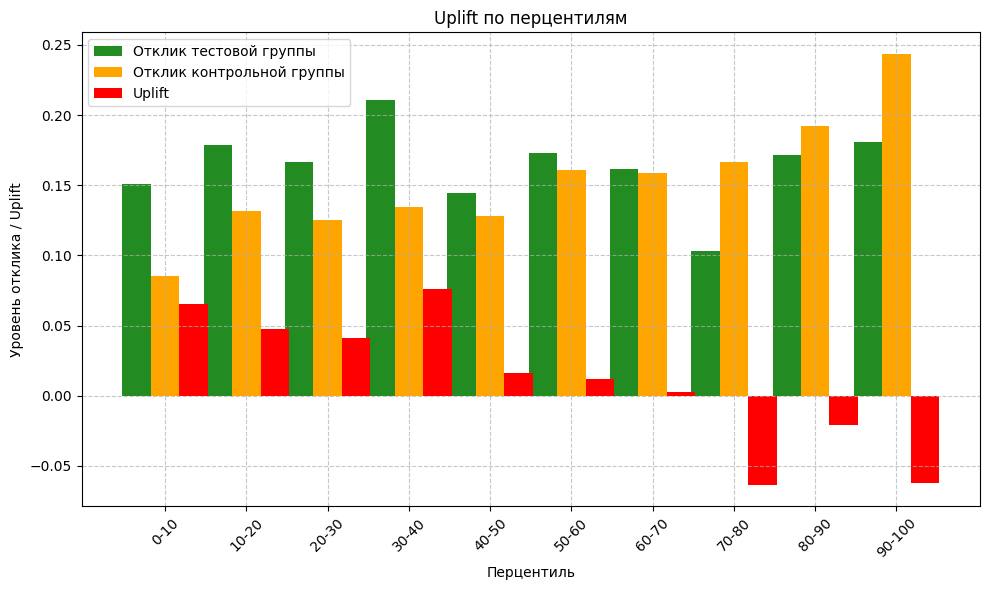

In [20]:
fig = custom_uplift_by_percentile(
    y_true=y_test,
    uplift=uplift,
    treatment=t_test,
    kind='bar',
    bins=10,
    title='Uplift по перцентилям'
)

In [21]:
fig.savefig("./models/fe_assets/Uplift по перцентилям.png")

В данной ячейке сделайте вывод о качестве работы модели и проинтерпретируйте график `uplift by percentile` 

# Этап 3

In [138]:
# Класс для инференса модели
class UpliftModelInference:
    """
    Класс для инференса uplift модели.
    """
    
    def __init__(self, model, feature_names, logger=None):
        """
        Инициализация класса.
        
        Аргументы:
            model: Обученная модель uplift
            feature_names: Список признаков для предсказания 
            logger: Объект для логирования (по умолчанию None)
        """
        self.model = model
        self.feature_names = ['recency', 'history_segment', 'history', 'mens', 'womens', 'zip_code', 'newbie', 'channel']
        self.logger = logger
        
        if self.logger:
            self.logger.info("Модель UpliftModel инициализирована с признаками: %s", feature_names)

    def _transform_data(self, X):
        """
        Преобразование данных для модели.
        
        Аргументы:
            X: pandas.DataFrame с признаками
        """
        if self.logger:
            self.logger.debug("Преобразование входных данных размерности %s", X.shape)

        # реализуйте преобразование данных для модели,
        # если в финальной модели используются новые признаки
       

        return X
    
    def predict(self, X):
        """
        Получение предсказаний uplift.
        
        Аргументы:
            X: pandas.DataFrame с признаками
            
        Возвращает:
            numpy.array с предсказанными значениями uplift
        """
        # Проверяем, что датафрейм не пустой
        if X.empty:
            if self.logger:
                self.logger.error("Предоставлен пустой датафрейм")
            return None
            
        # Проверяем наличие пропущенных значений
        if X.isnull().any().any():
            if self.logger:
                self.logger.error("Входные данные содержат пропущенные значения")
            return [None]*len(X)
        
        if self.logger:
            self.logger.info("Выполняем предсказания для данных размерности %s", X.shape)

        # Проверяем наличие всех необходимых признаков
        missing_features = set(self.feature_names) - set(X.columns)
        if missing_features:
            error_msg = f"Отсутствуют признаки: {missing_features}"
            if self.logger:
                self.logger.error(error_msg)

            return [None]*len(X)
        
        # Преобразуем данные для модели
        if self.logger:
            self.logger.debug("Начинаем преобразование данных")
        X = self._transform_data(X)
        
        # Вычисляем uplift
        if self.logger:
            self.logger.debug("Выполняем предсказания модели")
        

        # Дополните код для получения предсказаний аплифта

        
        if self.logger:
            self.logger.info("Предсказания успешно завершены")
            
        return uplift


In [126]:
model = UpliftModelInference(model= # ваш код,
                             feature_names= # ваш код)

In [ ]:
test_data = pd.DataFrame({
            'recency': [1, 2, 3],
            'history_segment': [1, 2, 3], 
            'history': [100, 200, 300],
            'mens': [1, 0, 1],
            'womens': [0, 1, 0],
            'zip_code': [1, 0, 1],
            'newbie': [0, 1, 0],
            'channel': [1, 2, 0]
        })

In [ ]:
# проверка работы класса
model.predict(test_data)